In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import learning_curve

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
df=pd.read_excel("CoF_29.xlsx",index_col=0)

In [3]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [4]:
dataset.shape

(1056, 30)

In [5]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [6]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [7]:
x1 = df.drop(['Act'],axis=1).astype (float)

In [8]:
y1=df['Act']

In [9]:
x.shape

(1056, 29)

In [10]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [11]:
x1

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Min net atomic charge for a N atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom
Structure,,,,,,,,,,,,,,,,,,,,,
"""24""",112.0,0.0268,0.0179,34926.0,12.2892,1.8436,0.7741,-0.0834,-0.0897,0.1727,...,0.4121,-0.4986,12.3110,0.1616,0.5401,0.9968,0.9632,3.1482,3.1818,0.2886
"""25""",124.0,0.0242,0.0161,45942.0,14.2714,1.7909,0.7153,-0.0834,-0.0897,0.1727,...,0.4035,-0.4863,10.3010,0.1022,0.4260,0.9968,0.9642,3.1685,3.1975,0.3048
"""32""",114.0,0.0351,0.0175,37022.0,12.4635,1.9804,0.7901,-0.0654,-0.0897,0.1727,...,0.4090,-0.4797,8.2613,0.0707,0.4509,0.9968,0.9619,1.3974,2.8002,0.3741
"""33""",115.0,0.0261,0.0174,38082.0,12.6464,1.9074,0.8067,-0.0842,-0.0899,0.1727,...,1.0012,-0.4987,11.9462,0.1445,0.3989,0.9968,0.9635,3.1466,3.1802,0.2864
"""34""",116.0,0.0259,0.0172,39330.0,12.5253,1.9625,0.8124,-0.0840,-0.0899,0.1727,...,1.1716,-0.4984,11.9235,0.1416,0.4177,0.9968,0.9632,3.1479,3.1813,0.2884
"""40""",122.0,0.0246,0.0164,43495.0,13.5387,1.8308,0.7722,-0.0842,-0.0902,0.1727,...,1.0072,-0.4797,9.7466,0.0921,0.1398,0.9968,0.9628,3.1593,3.1905,0.2971
"""41""",111.0,0.0360,0.0180,35648.0,12.2636,1.9636,0.7910,0.0107,-0.0899,0.1727,...,0.4162,-0.4767,7.0761,0.0527,0.1226,0.9967,0.9648,3.2210,3.3081,0.3092
"""42""",112.0,0.0268,0.0179,36690.0,12.3964,1.9074,0.8020,-0.0842,-0.0899,0.1727,...,1.0073,-0.4820,11.0254,0.1248,0.1174,0.9968,0.9631,3.1596,3.1900,0.2972
"""43""",113.0,0.0265,0.0177,37917.0,12.2753,1.9636,0.8076,-0.0840,-0.0899,0.1727,...,1.1763,-0.4821,11.4641,0.1328,0.1430,0.9968,0.9629,3.1612,3.1909,0.2973


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [13]:
x_test.shape

(212, 29)

In [14]:
x_train.shape

(844, 29)

In [15]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [16]:
val_dataset =cb.Pool(x1, y1)

In [17]:
cb.CatBoostRegressor?

In [18]:
regressor = cb.CatBoostRegressor(depth=8, learning_rate = 0.1,l2_leaf_reg = 3, loss_function='RMSE',
                                 iterations=1000)

In [19]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [20]:
regressor.fit(train_dataset)

0:	learn: 0.4619270	total: 185ms	remaining: 3m 4s
1:	learn: 0.4459094	total: 207ms	remaining: 1m 43s
2:	learn: 0.4304716	total: 230ms	remaining: 1m 16s
3:	learn: 0.4136563	total: 251ms	remaining: 1m 2s
4:	learn: 0.4010398	total: 272ms	remaining: 54.1s
5:	learn: 0.3882465	total: 293ms	remaining: 48.6s
6:	learn: 0.3777918	total: 315ms	remaining: 44.7s
7:	learn: 0.3671684	total: 336ms	remaining: 41.7s
8:	learn: 0.3591872	total: 357ms	remaining: 39.3s
9:	learn: 0.3531076	total: 379ms	remaining: 37.5s
10:	learn: 0.3453521	total: 418ms	remaining: 37.5s
11:	learn: 0.3392027	total: 440ms	remaining: 36.2s
12:	learn: 0.3315906	total: 462ms	remaining: 35.1s
13:	learn: 0.3245489	total: 483ms	remaining: 34s
14:	learn: 0.3190779	total: 504ms	remaining: 33.1s
15:	learn: 0.3141040	total: 526ms	remaining: 32.3s
16:	learn: 0.3092818	total: 547ms	remaining: 31.6s
17:	learn: 0.3039065	total: 569ms	remaining: 31s
18:	learn: 0.2994424	total: 595ms	remaining: 30.7s
19:	learn: 0.2949394	total: 625ms	remaining

167:	learn: 0.0985221	total: 4.67s	remaining: 23.1s
168:	learn: 0.0978337	total: 4.7s	remaining: 23.1s
169:	learn: 0.0970358	total: 4.73s	remaining: 23.1s
170:	learn: 0.0965868	total: 4.76s	remaining: 23.1s
171:	learn: 0.0959297	total: 4.79s	remaining: 23.1s
172:	learn: 0.0957599	total: 4.82s	remaining: 23s
173:	learn: 0.0956442	total: 4.85s	remaining: 23s
174:	learn: 0.0952124	total: 4.88s	remaining: 23s
175:	learn: 0.0946349	total: 4.92s	remaining: 23.1s
176:	learn: 0.0939265	total: 4.96s	remaining: 23s
177:	learn: 0.0931834	total: 4.98s	remaining: 23s
178:	learn: 0.0926514	total: 5.01s	remaining: 23s
179:	learn: 0.0925442	total: 5.04s	remaining: 23s
180:	learn: 0.0920209	total: 5.07s	remaining: 22.9s
181:	learn: 0.0917111	total: 5.1s	remaining: 22.9s
182:	learn: 0.0909913	total: 5.12s	remaining: 22.9s
183:	learn: 0.0907600	total: 5.14s	remaining: 22.8s
184:	learn: 0.0900240	total: 5.17s	remaining: 22.8s
185:	learn: 0.0895864	total: 5.19s	remaining: 22.7s
186:	learn: 0.0888263	total:

330:	learn: 0.0433877	total: 9.06s	remaining: 18.3s
331:	learn: 0.0430510	total: 9.09s	remaining: 18.3s
332:	learn: 0.0427638	total: 9.13s	remaining: 18.3s
333:	learn: 0.0425411	total: 9.17s	remaining: 18.3s
334:	learn: 0.0425223	total: 9.2s	remaining: 18.3s
335:	learn: 0.0423346	total: 9.24s	remaining: 18.3s
336:	learn: 0.0422094	total: 9.27s	remaining: 18.2s
337:	learn: 0.0421459	total: 9.31s	remaining: 18.2s
338:	learn: 0.0418757	total: 9.33s	remaining: 18.2s
339:	learn: 0.0416825	total: 9.36s	remaining: 18.2s
340:	learn: 0.0414928	total: 9.39s	remaining: 18.1s
341:	learn: 0.0414271	total: 9.41s	remaining: 18.1s
342:	learn: 0.0413218	total: 9.44s	remaining: 18.1s
343:	learn: 0.0409773	total: 9.46s	remaining: 18s
344:	learn: 0.0408978	total: 9.49s	remaining: 18s
345:	learn: 0.0408245	total: 9.51s	remaining: 18s
346:	learn: 0.0406604	total: 9.54s	remaining: 17.9s
347:	learn: 0.0405007	total: 9.56s	remaining: 17.9s
348:	learn: 0.0404393	total: 9.58s	remaining: 17.9s
349:	learn: 0.04035

492:	learn: 0.0222243	total: 13s	remaining: 13.4s
493:	learn: 0.0221681	total: 13.1s	remaining: 13.4s
494:	learn: 0.0221389	total: 13.1s	remaining: 13.3s
495:	learn: 0.0220885	total: 13.1s	remaining: 13.3s
496:	learn: 0.0220231	total: 13.1s	remaining: 13.3s
497:	learn: 0.0218810	total: 13.1s	remaining: 13.2s
498:	learn: 0.0218207	total: 13.2s	remaining: 13.2s
499:	learn: 0.0217425	total: 13.2s	remaining: 13.2s
500:	learn: 0.0217238	total: 13.2s	remaining: 13.2s
501:	learn: 0.0217042	total: 13.3s	remaining: 13.1s
502:	learn: 0.0216572	total: 13.3s	remaining: 13.1s
503:	learn: 0.0215595	total: 13.3s	remaining: 13.1s
504:	learn: 0.0215197	total: 13.3s	remaining: 13.1s
505:	learn: 0.0214554	total: 13.3s	remaining: 13s
506:	learn: 0.0213629	total: 13.4s	remaining: 13s
507:	learn: 0.0212911	total: 13.4s	remaining: 13s
508:	learn: 0.0212300	total: 13.4s	remaining: 12.9s
509:	learn: 0.0212008	total: 13.4s	remaining: 12.9s
510:	learn: 0.0211397	total: 13.5s	remaining: 12.9s
511:	learn: 0.021052

658:	learn: 0.0137842	total: 16.9s	remaining: 8.76s
659:	learn: 0.0137553	total: 16.9s	remaining: 8.73s
660:	learn: 0.0137338	total: 17s	remaining: 8.7s
661:	learn: 0.0136589	total: 17s	remaining: 8.67s
662:	learn: 0.0136467	total: 17s	remaining: 8.65s
663:	learn: 0.0135998	total: 17s	remaining: 8.62s
664:	learn: 0.0135756	total: 17.1s	remaining: 8.6s
665:	learn: 0.0135201	total: 17.1s	remaining: 8.57s
666:	learn: 0.0135098	total: 17.1s	remaining: 8.54s
667:	learn: 0.0135049	total: 17.1s	remaining: 8.52s
668:	learn: 0.0135025	total: 17.1s	remaining: 8.48s
669:	learn: 0.0134669	total: 17.2s	remaining: 8.45s
670:	learn: 0.0134429	total: 17.2s	remaining: 8.42s
671:	learn: 0.0134245	total: 17.2s	remaining: 8.4s
672:	learn: 0.0133966	total: 17.2s	remaining: 8.37s
673:	learn: 0.0133534	total: 17.2s	remaining: 8.34s
674:	learn: 0.0133471	total: 17.3s	remaining: 8.31s
675:	learn: 0.0133114	total: 17.3s	remaining: 8.29s
676:	learn: 0.0132573	total: 17.3s	remaining: 8.26s
677:	learn: 0.0132324	t

817:	learn: 0.0102908	total: 20.7s	remaining: 4.61s
818:	learn: 0.0102834	total: 20.7s	remaining: 4.58s
819:	learn: 0.0102824	total: 20.8s	remaining: 4.56s
820:	learn: 0.0102673	total: 20.8s	remaining: 4.53s
821:	learn: 0.0102403	total: 20.8s	remaining: 4.5s
822:	learn: 0.0102307	total: 20.8s	remaining: 4.48s
823:	learn: 0.0102216	total: 20.9s	remaining: 4.46s
824:	learn: 0.0102118	total: 20.9s	remaining: 4.43s
825:	learn: 0.0101997	total: 20.9s	remaining: 4.41s
826:	learn: 0.0101902	total: 21s	remaining: 4.38s
827:	learn: 0.0101788	total: 21s	remaining: 4.36s
828:	learn: 0.0101774	total: 21s	remaining: 4.34s
829:	learn: 0.0101698	total: 21.1s	remaining: 4.31s
830:	learn: 0.0101575	total: 21.1s	remaining: 4.29s
831:	learn: 0.0101420	total: 21.1s	remaining: 4.26s
832:	learn: 0.0101244	total: 21.1s	remaining: 4.24s
833:	learn: 0.0100987	total: 21.2s	remaining: 4.21s
834:	learn: 0.0100833	total: 21.2s	remaining: 4.18s
835:	learn: 0.0100653	total: 21.2s	remaining: 4.16s
836:	learn: 0.01006

984:	learn: 0.0088467	total: 24.6s	remaining: 375ms
985:	learn: 0.0088419	total: 24.7s	remaining: 350ms
986:	learn: 0.0088415	total: 24.7s	remaining: 325ms
987:	learn: 0.0088378	total: 24.7s	remaining: 300ms
988:	learn: 0.0088300	total: 24.7s	remaining: 275ms
989:	learn: 0.0088235	total: 24.8s	remaining: 250ms
990:	learn: 0.0088175	total: 24.8s	remaining: 225ms
991:	learn: 0.0088122	total: 24.8s	remaining: 200ms
992:	learn: 0.0088062	total: 24.8s	remaining: 175ms
993:	learn: 0.0088001	total: 24.8s	remaining: 150ms
994:	learn: 0.0087964	total: 24.9s	remaining: 125ms
995:	learn: 0.0087931	total: 24.9s	remaining: 100ms
996:	learn: 0.0087872	total: 24.9s	remaining: 75ms
997:	learn: 0.0087817	total: 24.9s	remaining: 50ms
998:	learn: 0.0087781	total: 25s	remaining: 25ms
999:	learn: 0.0087728	total: 25s	remaining: 0us


In [21]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:26.203000


In [22]:
# To know the learning rate 
print("Learning rate: ", regressor.learning_rate_)

Learning rate:  0.10000000149011612


In [23]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [24]:
y_pred

array([ 1.25405607e-01,  3.48545741e-01,  1.22198572e-01,  7.55708736e-01,
        2.10420442e-01,  8.50059045e-01,  3.84752766e-01,  2.52894885e-01,
        7.30690370e-01,  8.57664757e-03,  7.08262276e-01,  3.83046341e-01,
        6.66985094e-01,  6.85269933e-01,  5.62000801e-01,  1.31172808e-01,
        1.09683989e+00,  9.04892224e-01,  1.40165760e+00,  8.74380920e-01,
        8.09898392e-01,  1.08260546e-01,  4.65050665e-02,  5.93417975e-01,
        1.15580887e-01,  1.72211091e-01,  8.22605867e-02,  6.37989910e-01,
        2.02616593e+00,  5.49251397e-01,  6.73905639e-01,  1.07814857e+00,
        5.00991635e-01,  1.41990746e-01,  2.42869116e-01,  4.21678959e-01,
        9.67534427e-01,  1.48308090e+00,  2.50852116e-02,  1.23022904e-01,
        6.10796111e-01,  2.16306133e-01,  7.12792355e-01,  2.22647187e-01,
        2.44870750e-01,  1.18427169e+00,  1.23325368e-01,  1.03979006e+00,
        4.62561143e-01,  9.88766781e-01,  2.00857152e-01,  1.63538725e-01,
        5.25477421e-01,  

In [25]:
y_pred_train = regressor.predict(x_train)

In [26]:
y_pred1=regressor.predict(x1)

In [27]:
y_pred1

array([0.86946254, 0.71661568, 0.62838005, 0.89777191, 0.89577715,
       0.79126432, 0.69029494, 0.85305132, 0.8653223 , 0.81367039,
       0.42730092, 0.4289467 , 0.4403701 , 0.4403701 , 0.72126587,
       0.66611773, 0.53219892, 0.39131934, 0.57614011, 0.62311594,
       0.50118728, 0.48507128, 0.40582097, 0.45640355, 0.67974524,
       0.39311258, 0.46994939, 0.61175836, 0.50101093, 0.42181344])

In [28]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [29]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [30]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.14418257767877313
MSE is 0.04337478977825152
R2 score is 0.8338643654511465


In [31]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [32]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.0031030219980917365
MSE is 7.696190785875361e-05
R2 score is 0.9996667520333224


In [32]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

0:	learn: 0.4701165	total: 34ms	remaining: 33.9s
1:	learn: 0.4540595	total: 64.5ms	remaining: 32.2s
2:	learn: 0.4393889	total: 98.1ms	remaining: 32.6s
3:	learn: 0.4230607	total: 137ms	remaining: 34.2s
4:	learn: 0.4103808	total: 170ms	remaining: 33.8s
5:	learn: 0.4000346	total: 198ms	remaining: 32.8s
6:	learn: 0.3894729	total: 228ms	remaining: 32.3s
7:	learn: 0.3795497	total: 269ms	remaining: 33.4s
8:	learn: 0.3723463	total: 300ms	remaining: 33.1s
9:	learn: 0.3631357	total: 329ms	remaining: 32.6s
10:	learn: 0.3539189	total: 356ms	remaining: 32s
11:	learn: 0.3473158	total: 387ms	remaining: 31.9s
12:	learn: 0.3392223	total: 414ms	remaining: 31.4s
13:	learn: 0.3318623	total: 441ms	remaining: 31.1s
14:	learn: 0.3271689	total: 470ms	remaining: 30.8s
15:	learn: 0.3208621	total: 507ms	remaining: 31.2s
16:	learn: 0.3155370	total: 537ms	remaining: 31s
17:	learn: 0.3098398	total: 564ms	remaining: 30.8s
18:	learn: 0.3066052	total: 601ms	remaining: 31s
19:	learn: 0.3016920	total: 631ms	remaining: 3

164:	learn: 0.1034481	total: 4.81s	remaining: 24.3s
165:	learn: 0.1026259	total: 4.83s	remaining: 24.3s
166:	learn: 0.1018454	total: 4.85s	remaining: 24.2s
167:	learn: 0.1005931	total: 4.88s	remaining: 24.2s
168:	learn: 0.0999439	total: 4.9s	remaining: 24.1s
169:	learn: 0.0996084	total: 4.92s	remaining: 24s
170:	learn: 0.0984956	total: 4.95s	remaining: 24s
171:	learn: 0.0978354	total: 4.97s	remaining: 23.9s
172:	learn: 0.0974918	total: 5s	remaining: 23.9s
173:	learn: 0.0972878	total: 5.04s	remaining: 23.9s
174:	learn: 0.0962017	total: 5.06s	remaining: 23.9s
175:	learn: 0.0954078	total: 5.08s	remaining: 23.8s
176:	learn: 0.0952932	total: 5.11s	remaining: 23.8s
177:	learn: 0.0950584	total: 5.13s	remaining: 23.7s
178:	learn: 0.0942789	total: 5.16s	remaining: 23.7s
179:	learn: 0.0941725	total: 5.18s	remaining: 23.6s
180:	learn: 0.0935143	total: 5.2s	remaining: 23.5s
181:	learn: 0.0931702	total: 5.23s	remaining: 23.5s
182:	learn: 0.0930288	total: 5.25s	remaining: 23.5s
183:	learn: 0.0924900

328:	learn: 0.0413978	total: 8.97s	remaining: 18.3s
329:	learn: 0.0411532	total: 9.01s	remaining: 18.3s
330:	learn: 0.0409644	total: 9.04s	remaining: 18.3s
331:	learn: 0.0406511	total: 9.06s	remaining: 18.2s
332:	learn: 0.0403525	total: 9.09s	remaining: 18.2s
333:	learn: 0.0401845	total: 9.13s	remaining: 18.2s
334:	learn: 0.0401272	total: 9.16s	remaining: 18.2s
335:	learn: 0.0399850	total: 9.19s	remaining: 18.2s
336:	learn: 0.0397425	total: 9.21s	remaining: 18.1s
337:	learn: 0.0396044	total: 9.23s	remaining: 18.1s
338:	learn: 0.0392397	total: 9.25s	remaining: 18s
339:	learn: 0.0391647	total: 9.28s	remaining: 18s
340:	learn: 0.0389400	total: 9.3s	remaining: 18s
341:	learn: 0.0386664	total: 9.32s	remaining: 17.9s
342:	learn: 0.0384364	total: 9.35s	remaining: 17.9s
343:	learn: 0.0381933	total: 9.37s	remaining: 17.9s
344:	learn: 0.0379846	total: 9.39s	remaining: 17.8s
345:	learn: 0.0379159	total: 9.42s	remaining: 17.8s
346:	learn: 0.0377511	total: 9.44s	remaining: 17.8s
347:	learn: 0.03754

493:	learn: 0.0178753	total: 12.8s	remaining: 13.2s
494:	learn: 0.0178189	total: 12.9s	remaining: 13.1s
495:	learn: 0.0178052	total: 12.9s	remaining: 13.1s
496:	learn: 0.0177063	total: 12.9s	remaining: 13.1s
497:	learn: 0.0175707	total: 13s	remaining: 13.1s
498:	learn: 0.0174705	total: 13s	remaining: 13s
499:	learn: 0.0174441	total: 13s	remaining: 13s
500:	learn: 0.0173578	total: 13s	remaining: 13s
501:	learn: 0.0173360	total: 13s	remaining: 12.9s
502:	learn: 0.0172495	total: 13.1s	remaining: 12.9s
503:	learn: 0.0171232	total: 13.1s	remaining: 12.9s
504:	learn: 0.0169796	total: 13.1s	remaining: 12.8s
505:	learn: 0.0168519	total: 13.1s	remaining: 12.8s
506:	learn: 0.0168136	total: 13.1s	remaining: 12.8s
507:	learn: 0.0167325	total: 13.2s	remaining: 12.8s
508:	learn: 0.0166409	total: 13.2s	remaining: 12.7s
509:	learn: 0.0165855	total: 13.2s	remaining: 12.7s
510:	learn: 0.0164592	total: 13.2s	remaining: 12.7s
511:	learn: 0.0163622	total: 13.3s	remaining: 12.6s
512:	learn: 0.0162755	total:

657:	learn: 0.0090353	total: 16.8s	remaining: 8.71s
658:	learn: 0.0090176	total: 16.8s	remaining: 8.69s
659:	learn: 0.0089970	total: 16.8s	remaining: 8.66s
660:	learn: 0.0089592	total: 16.8s	remaining: 8.63s
661:	learn: 0.0089086	total: 16.9s	remaining: 8.6s
662:	learn: 0.0088911	total: 16.9s	remaining: 8.58s
663:	learn: 0.0088859	total: 16.9s	remaining: 8.55s
664:	learn: 0.0088547	total: 16.9s	remaining: 8.52s
665:	learn: 0.0088087	total: 16.9s	remaining: 8.5s
666:	learn: 0.0087830	total: 17s	remaining: 8.48s
667:	learn: 0.0087749	total: 17s	remaining: 8.46s
668:	learn: 0.0087206	total: 17s	remaining: 8.43s
669:	learn: 0.0086591	total: 17.1s	remaining: 8.4s
670:	learn: 0.0086071	total: 17.1s	remaining: 8.37s
671:	learn: 0.0085912	total: 17.1s	remaining: 8.35s
672:	learn: 0.0085894	total: 17.1s	remaining: 8.32s
673:	learn: 0.0085097	total: 17.1s	remaining: 8.29s
674:	learn: 0.0085011	total: 17.2s	remaining: 8.26s
675:	learn: 0.0084567	total: 17.2s	remaining: 8.24s
676:	learn: 0.0084496

817:	learn: 0.0048997	total: 20.5s	remaining: 4.55s
818:	learn: 0.0048857	total: 20.5s	remaining: 4.53s
819:	learn: 0.0048699	total: 20.5s	remaining: 4.5s
820:	learn: 0.0048595	total: 20.5s	remaining: 4.47s
821:	learn: 0.0048492	total: 20.5s	remaining: 4.45s
822:	learn: 0.0048223	total: 20.6s	remaining: 4.42s
823:	learn: 0.0048077	total: 20.6s	remaining: 4.4s
824:	learn: 0.0047807	total: 20.6s	remaining: 4.37s
825:	learn: 0.0047730	total: 20.6s	remaining: 4.35s
826:	learn: 0.0047349	total: 20.7s	remaining: 4.33s
827:	learn: 0.0047180	total: 20.7s	remaining: 4.3s
828:	learn: 0.0046706	total: 20.7s	remaining: 4.27s
829:	learn: 0.0046489	total: 20.7s	remaining: 4.25s
830:	learn: 0.0046378	total: 20.8s	remaining: 4.22s
831:	learn: 0.0046164	total: 20.8s	remaining: 4.2s
832:	learn: 0.0046033	total: 20.8s	remaining: 4.17s
833:	learn: 0.0045640	total: 20.8s	remaining: 4.14s
834:	learn: 0.0045522	total: 20.8s	remaining: 4.12s
835:	learn: 0.0045473	total: 20.9s	remaining: 4.09s
836:	learn: 0.00

978:	learn: 0.0027299	total: 24.1s	remaining: 518ms
979:	learn: 0.0027249	total: 24.2s	remaining: 493ms
980:	learn: 0.0027112	total: 24.2s	remaining: 469ms
981:	learn: 0.0027018	total: 24.2s	remaining: 444ms
982:	learn: 0.0026909	total: 24.2s	remaining: 419ms
983:	learn: 0.0026833	total: 24.3s	remaining: 395ms
984:	learn: 0.0026621	total: 24.3s	remaining: 370ms
985:	learn: 0.0026414	total: 24.3s	remaining: 345ms
986:	learn: 0.0026344	total: 24.3s	remaining: 321ms
987:	learn: 0.0026251	total: 24.4s	remaining: 296ms
988:	learn: 0.0026119	total: 24.4s	remaining: 271ms
989:	learn: 0.0025982	total: 24.4s	remaining: 247ms
990:	learn: 0.0025808	total: 24.4s	remaining: 222ms
991:	learn: 0.0025775	total: 24.4s	remaining: 197ms
992:	learn: 0.0025570	total: 24.5s	remaining: 172ms
993:	learn: 0.0025529	total: 24.5s	remaining: 148ms
994:	learn: 0.0025516	total: 24.5s	remaining: 123ms
995:	learn: 0.0025354	total: 24.5s	remaining: 98.5ms
996:	learn: 0.0025344	total: 24.6s	remaining: 73.9ms
997:	learn

144:	learn: 0.1079359	total: 3.48s	remaining: 20.5s
145:	learn: 0.1072930	total: 3.51s	remaining: 20.5s
146:	learn: 0.1066161	total: 3.53s	remaining: 20.5s
147:	learn: 0.1053853	total: 3.56s	remaining: 20.5s
148:	learn: 0.1050376	total: 3.59s	remaining: 20.5s
149:	learn: 0.1048405	total: 3.61s	remaining: 20.5s
150:	learn: 0.1047766	total: 3.63s	remaining: 20.4s
151:	learn: 0.1042858	total: 3.65s	remaining: 20.4s
152:	learn: 0.1032820	total: 3.67s	remaining: 20.3s
153:	learn: 0.1031959	total: 3.7s	remaining: 20.3s
154:	learn: 0.1019965	total: 3.73s	remaining: 20.3s
155:	learn: 0.1015583	total: 3.75s	remaining: 20.3s
156:	learn: 0.1014094	total: 3.77s	remaining: 20.3s
157:	learn: 0.1002814	total: 3.79s	remaining: 20.2s
158:	learn: 0.0991593	total: 3.81s	remaining: 20.2s
159:	learn: 0.0980157	total: 3.83s	remaining: 20.1s
160:	learn: 0.0978618	total: 3.86s	remaining: 20.1s
161:	learn: 0.0968783	total: 3.88s	remaining: 20.1s
162:	learn: 0.0959862	total: 3.9s	remaining: 20s
163:	learn: 0.09

304:	learn: 0.0432285	total: 7.19s	remaining: 16.4s
305:	learn: 0.0428862	total: 7.23s	remaining: 16.4s
306:	learn: 0.0425747	total: 7.25s	remaining: 16.4s
307:	learn: 0.0425402	total: 7.27s	remaining: 16.3s
308:	learn: 0.0422614	total: 7.29s	remaining: 16.3s
309:	learn: 0.0421534	total: 7.32s	remaining: 16.3s
310:	learn: 0.0418553	total: 7.34s	remaining: 16.3s
311:	learn: 0.0417414	total: 7.36s	remaining: 16.2s
312:	learn: 0.0414757	total: 7.38s	remaining: 16.2s
313:	learn: 0.0412336	total: 7.41s	remaining: 16.2s
314:	learn: 0.0410488	total: 7.44s	remaining: 16.2s
315:	learn: 0.0409941	total: 7.46s	remaining: 16.2s
316:	learn: 0.0409377	total: 7.49s	remaining: 16.1s
317:	learn: 0.0406723	total: 7.51s	remaining: 16.1s
318:	learn: 0.0403777	total: 7.53s	remaining: 16.1s
319:	learn: 0.0399754	total: 7.55s	remaining: 16s
320:	learn: 0.0399668	total: 7.57s	remaining: 16s
321:	learn: 0.0399541	total: 7.59s	remaining: 16s
322:	learn: 0.0396818	total: 7.62s	remaining: 16s
323:	learn: 0.039672

470:	learn: 0.0212893	total: 11.1s	remaining: 12.5s
471:	learn: 0.0212169	total: 11.2s	remaining: 12.5s
472:	learn: 0.0211650	total: 11.2s	remaining: 12.5s
473:	learn: 0.0210430	total: 11.2s	remaining: 12.4s
474:	learn: 0.0209538	total: 11.2s	remaining: 12.4s
475:	learn: 0.0209493	total: 11.2s	remaining: 12.4s
476:	learn: 0.0209380	total: 11.3s	remaining: 12.4s
477:	learn: 0.0209300	total: 11.3s	remaining: 12.3s
478:	learn: 0.0208559	total: 11.3s	remaining: 12.3s
479:	learn: 0.0207173	total: 11.3s	remaining: 12.3s
480:	learn: 0.0206426	total: 11.4s	remaining: 12.3s
481:	learn: 0.0206219	total: 11.4s	remaining: 12.3s
482:	learn: 0.0206175	total: 11.4s	remaining: 12.2s
483:	learn: 0.0205646	total: 11.4s	remaining: 12.2s
484:	learn: 0.0205172	total: 11.5s	remaining: 12.2s
485:	learn: 0.0205057	total: 11.5s	remaining: 12.2s
486:	learn: 0.0204269	total: 11.5s	remaining: 12.1s
487:	learn: 0.0202632	total: 11.5s	remaining: 12.1s
488:	learn: 0.0201750	total: 11.6s	remaining: 12.1s
489:	learn: 

629:	learn: 0.0136228	total: 14.8s	remaining: 8.71s
630:	learn: 0.0135873	total: 14.8s	remaining: 8.68s
631:	learn: 0.0135830	total: 14.9s	remaining: 8.66s
632:	learn: 0.0135460	total: 14.9s	remaining: 8.63s
633:	learn: 0.0135432	total: 14.9s	remaining: 8.61s
634:	learn: 0.0135391	total: 14.9s	remaining: 8.58s
635:	learn: 0.0134868	total: 15s	remaining: 8.56s
636:	learn: 0.0134785	total: 15s	remaining: 8.53s
637:	learn: 0.0134749	total: 15s	remaining: 8.51s
638:	learn: 0.0134413	total: 15s	remaining: 8.49s
639:	learn: 0.0133964	total: 15.1s	remaining: 8.47s
640:	learn: 0.0133801	total: 15.1s	remaining: 8.45s
641:	learn: 0.0133749	total: 15.1s	remaining: 8.42s
642:	learn: 0.0133719	total: 15.1s	remaining: 8.4s
643:	learn: 0.0133700	total: 15.1s	remaining: 8.37s
644:	learn: 0.0133386	total: 15.2s	remaining: 8.35s
645:	learn: 0.0133292	total: 15.2s	remaining: 8.32s
646:	learn: 0.0133031	total: 15.2s	remaining: 8.3s
647:	learn: 0.0132644	total: 15.2s	remaining: 8.27s
648:	learn: 0.0132615	

789:	learn: 0.0104948	total: 18.5s	remaining: 4.92s
790:	learn: 0.0104835	total: 18.5s	remaining: 4.9s
791:	learn: 0.0104825	total: 18.6s	remaining: 4.87s
792:	learn: 0.0104609	total: 18.6s	remaining: 4.85s
793:	learn: 0.0104462	total: 18.6s	remaining: 4.83s
794:	learn: 0.0104405	total: 18.6s	remaining: 4.8s
795:	learn: 0.0104390	total: 18.6s	remaining: 4.78s
796:	learn: 0.0104210	total: 18.7s	remaining: 4.75s
797:	learn: 0.0104111	total: 18.7s	remaining: 4.73s
798:	learn: 0.0103995	total: 18.7s	remaining: 4.71s
799:	learn: 0.0103962	total: 18.8s	remaining: 4.69s
800:	learn: 0.0103876	total: 18.8s	remaining: 4.67s
801:	learn: 0.0103729	total: 18.8s	remaining: 4.64s
802:	learn: 0.0103581	total: 18.8s	remaining: 4.62s
803:	learn: 0.0103479	total: 18.8s	remaining: 4.59s
804:	learn: 0.0103330	total: 18.9s	remaining: 4.57s
805:	learn: 0.0103213	total: 18.9s	remaining: 4.54s
806:	learn: 0.0103111	total: 18.9s	remaining: 4.52s
807:	learn: 0.0103017	total: 18.9s	remaining: 4.5s
808:	learn: 0.0

956:	learn: 0.0094591	total: 22.5s	remaining: 1.01s
957:	learn: 0.0094588	total: 22.5s	remaining: 987ms
958:	learn: 0.0094530	total: 22.5s	remaining: 963ms
959:	learn: 0.0094493	total: 22.6s	remaining: 940ms
960:	learn: 0.0094484	total: 22.6s	remaining: 916ms
961:	learn: 0.0094402	total: 22.6s	remaining: 893ms
962:	learn: 0.0094359	total: 22.6s	remaining: 869ms
963:	learn: 0.0094345	total: 22.6s	remaining: 846ms
964:	learn: 0.0094293	total: 22.7s	remaining: 822ms
965:	learn: 0.0094239	total: 22.7s	remaining: 799ms
966:	learn: 0.0094193	total: 22.7s	remaining: 776ms
967:	learn: 0.0094145	total: 22.8s	remaining: 752ms
968:	learn: 0.0094125	total: 22.8s	remaining: 729ms
969:	learn: 0.0094097	total: 22.8s	remaining: 705ms
970:	learn: 0.0094060	total: 22.8s	remaining: 682ms
971:	learn: 0.0094026	total: 22.9s	remaining: 658ms
972:	learn: 0.0094019	total: 22.9s	remaining: 635ms
973:	learn: 0.0093994	total: 22.9s	remaining: 611ms
974:	learn: 0.0093985	total: 22.9s	remaining: 588ms
975:	learn: 

125:	learn: 0.1250922	total: 3.07s	remaining: 21.3s
126:	learn: 0.1240209	total: 3.09s	remaining: 21.3s
127:	learn: 0.1227793	total: 3.12s	remaining: 21.2s
128:	learn: 0.1224893	total: 3.14s	remaining: 21.2s
129:	learn: 0.1214049	total: 3.16s	remaining: 21.1s
130:	learn: 0.1200517	total: 3.18s	remaining: 21.1s
131:	learn: 0.1186400	total: 3.2s	remaining: 21.1s
132:	learn: 0.1180554	total: 3.22s	remaining: 21s
133:	learn: 0.1170394	total: 3.24s	remaining: 21s
134:	learn: 0.1162584	total: 3.27s	remaining: 20.9s
135:	learn: 0.1159701	total: 3.3s	remaining: 21s
136:	learn: 0.1157671	total: 3.33s	remaining: 21s
137:	learn: 0.1156634	total: 3.35s	remaining: 20.9s
138:	learn: 0.1152738	total: 3.37s	remaining: 20.9s
139:	learn: 0.1141653	total: 3.39s	remaining: 20.9s
140:	learn: 0.1137401	total: 3.41s	remaining: 20.8s
141:	learn: 0.1126356	total: 3.44s	remaining: 20.8s
142:	learn: 0.1124531	total: 3.46s	remaining: 20.7s
143:	learn: 0.1113066	total: 3.48s	remaining: 20.7s
144:	learn: 0.1107359	

286:	learn: 0.0469999	total: 6.81s	remaining: 16.9s
287:	learn: 0.0465445	total: 6.83s	remaining: 16.9s
288:	learn: 0.0464838	total: 6.86s	remaining: 16.9s
289:	learn: 0.0462492	total: 6.88s	remaining: 16.8s
290:	learn: 0.0462287	total: 6.9s	remaining: 16.8s
291:	learn: 0.0461191	total: 6.92s	remaining: 16.8s
292:	learn: 0.0460532	total: 6.94s	remaining: 16.8s
293:	learn: 0.0457093	total: 6.96s	remaining: 16.7s
294:	learn: 0.0456572	total: 6.99s	remaining: 16.7s
295:	learn: 0.0453739	total: 7.02s	remaining: 16.7s
296:	learn: 0.0453397	total: 7.05s	remaining: 16.7s
297:	learn: 0.0450754	total: 7.07s	remaining: 16.7s
298:	learn: 0.0447125	total: 7.1s	remaining: 16.6s
299:	learn: 0.0445778	total: 7.12s	remaining: 16.6s
300:	learn: 0.0445092	total: 7.14s	remaining: 16.6s
301:	learn: 0.0439994	total: 7.16s	remaining: 16.6s
302:	learn: 0.0437268	total: 7.18s	remaining: 16.5s
303:	learn: 0.0433591	total: 7.2s	remaining: 16.5s
304:	learn: 0.0431228	total: 7.23s	remaining: 16.5s
305:	learn: 0.0

453:	learn: 0.0219021	total: 10.9s	remaining: 13.1s
454:	learn: 0.0217727	total: 11s	remaining: 13.1s
455:	learn: 0.0217006	total: 11s	remaining: 13.1s
456:	learn: 0.0215636	total: 11s	remaining: 13.1s
457:	learn: 0.0215124	total: 11s	remaining: 13s
458:	learn: 0.0214204	total: 11.1s	remaining: 13s
459:	learn: 0.0213995	total: 11.1s	remaining: 13s
460:	learn: 0.0213441	total: 11.1s	remaining: 13s
461:	learn: 0.0212768	total: 11.1s	remaining: 13s
462:	learn: 0.0211749	total: 11.2s	remaining: 12.9s
463:	learn: 0.0210361	total: 11.2s	remaining: 12.9s
464:	learn: 0.0209039	total: 11.2s	remaining: 12.9s
465:	learn: 0.0208975	total: 11.2s	remaining: 12.9s
466:	learn: 0.0208037	total: 11.2s	remaining: 12.8s
467:	learn: 0.0206565	total: 11.3s	remaining: 12.8s
468:	learn: 0.0205279	total: 11.3s	remaining: 12.8s
469:	learn: 0.0204153	total: 11.3s	remaining: 12.7s
470:	learn: 0.0203378	total: 11.3s	remaining: 12.7s
471:	learn: 0.0202869	total: 11.4s	remaining: 12.7s
472:	learn: 0.0201873	total: 1

619:	learn: 0.0132744	total: 15.1s	remaining: 9.23s
620:	learn: 0.0132676	total: 15.1s	remaining: 9.2s
621:	learn: 0.0132164	total: 15.1s	remaining: 9.18s
622:	learn: 0.0131779	total: 15.1s	remaining: 9.16s
623:	learn: 0.0131453	total: 15.2s	remaining: 9.14s
624:	learn: 0.0131034	total: 15.2s	remaining: 9.11s
625:	learn: 0.0130993	total: 15.2s	remaining: 9.08s
626:	learn: 0.0130726	total: 15.2s	remaining: 9.06s
627:	learn: 0.0130303	total: 15.3s	remaining: 9.03s
628:	learn: 0.0129838	total: 15.3s	remaining: 9.01s
629:	learn: 0.0129654	total: 15.3s	remaining: 8.98s
630:	learn: 0.0129231	total: 15.3s	remaining: 8.96s
631:	learn: 0.0128709	total: 15.3s	remaining: 8.93s
632:	learn: 0.0128696	total: 15.4s	remaining: 8.91s
633:	learn: 0.0128239	total: 15.4s	remaining: 8.88s
634:	learn: 0.0127791	total: 15.4s	remaining: 8.85s
635:	learn: 0.0127461	total: 15.4s	remaining: 8.83s
636:	learn: 0.0127124	total: 15.4s	remaining: 8.8s
637:	learn: 0.0126746	total: 15.5s	remaining: 8.78s
638:	learn: 0.

783:	learn: 0.0102324	total: 19s	remaining: 5.22s
784:	learn: 0.0102198	total: 19s	remaining: 5.2s
785:	learn: 0.0102063	total: 19s	remaining: 5.18s
786:	learn: 0.0102007	total: 19s	remaining: 5.16s
787:	learn: 0.0101928	total: 19.1s	remaining: 5.13s
788:	learn: 0.0101844	total: 19.1s	remaining: 5.11s
789:	learn: 0.0101753	total: 19.1s	remaining: 5.08s
790:	learn: 0.0101680	total: 19.1s	remaining: 5.05s
791:	learn: 0.0101605	total: 19.2s	remaining: 5.03s
792:	learn: 0.0101569	total: 19.2s	remaining: 5.01s
793:	learn: 0.0101468	total: 19.2s	remaining: 4.98s
794:	learn: 0.0101371	total: 19.2s	remaining: 4.96s
795:	learn: 0.0101232	total: 19.3s	remaining: 4.93s
796:	learn: 0.0101117	total: 19.3s	remaining: 4.91s
797:	learn: 0.0101109	total: 19.3s	remaining: 4.89s
798:	learn: 0.0100991	total: 19.3s	remaining: 4.86s
799:	learn: 0.0100878	total: 19.3s	remaining: 4.84s
800:	learn: 0.0100799	total: 19.4s	remaining: 4.81s
801:	learn: 0.0100692	total: 19.4s	remaining: 4.79s
802:	learn: 0.0100592

946:	learn: 0.0093568	total: 23.1s	remaining: 1.29s
947:	learn: 0.0093525	total: 23.2s	remaining: 1.27s
948:	learn: 0.0093508	total: 23.2s	remaining: 1.25s
949:	learn: 0.0093473	total: 23.2s	remaining: 1.22s
950:	learn: 0.0093454	total: 23.2s	remaining: 1.2s
951:	learn: 0.0093450	total: 23.3s	remaining: 1.17s
952:	learn: 0.0093432	total: 23.3s	remaining: 1.15s
953:	learn: 0.0093418	total: 23.3s	remaining: 1.12s
954:	learn: 0.0093388	total: 23.4s	remaining: 1.1s
955:	learn: 0.0093370	total: 23.4s	remaining: 1.08s
956:	learn: 0.0093362	total: 23.4s	remaining: 1.05s
957:	learn: 0.0093334	total: 23.4s	remaining: 1.03s
958:	learn: 0.0093293	total: 23.5s	remaining: 1s
959:	learn: 0.0093288	total: 23.5s	remaining: 978ms
960:	learn: 0.0093251	total: 23.5s	remaining: 954ms
961:	learn: 0.0093232	total: 23.5s	remaining: 929ms
962:	learn: 0.0093210	total: 23.5s	remaining: 905ms
963:	learn: 0.0093201	total: 23.6s	remaining: 880ms
964:	learn: 0.0093164	total: 23.6s	remaining: 856ms
965:	learn: 0.009

113:	learn: 0.1299163	total: 2.65s	remaining: 20.6s
114:	learn: 0.1296170	total: 2.68s	remaining: 20.6s
115:	learn: 0.1292783	total: 2.71s	remaining: 20.6s
116:	learn: 0.1280840	total: 2.73s	remaining: 20.6s
117:	learn: 0.1263354	total: 2.75s	remaining: 20.5s
118:	learn: 0.1261001	total: 2.77s	remaining: 20.5s
119:	learn: 0.1256228	total: 2.79s	remaining: 20.4s
120:	learn: 0.1241506	total: 2.81s	remaining: 20.4s
121:	learn: 0.1238309	total: 2.83s	remaining: 20.4s
122:	learn: 0.1228148	total: 2.86s	remaining: 20.4s
123:	learn: 0.1222699	total: 2.89s	remaining: 20.4s
124:	learn: 0.1220899	total: 2.91s	remaining: 20.4s
125:	learn: 0.1207834	total: 2.94s	remaining: 20.4s
126:	learn: 0.1197790	total: 2.96s	remaining: 20.4s
127:	learn: 0.1193276	total: 2.98s	remaining: 20.3s
128:	learn: 0.1180375	total: 3s	remaining: 20.3s
129:	learn: 0.1168156	total: 3.02s	remaining: 20.2s
130:	learn: 0.1154035	total: 3.05s	remaining: 20.2s
131:	learn: 0.1140831	total: 3.07s	remaining: 20.2s
132:	learn: 0.1

274:	learn: 0.0489643	total: 6.38s	remaining: 16.8s
275:	learn: 0.0487070	total: 6.42s	remaining: 16.8s
276:	learn: 0.0484343	total: 6.45s	remaining: 16.8s
277:	learn: 0.0480612	total: 6.47s	remaining: 16.8s
278:	learn: 0.0479378	total: 6.49s	remaining: 16.8s
279:	learn: 0.0477118	total: 6.51s	remaining: 16.7s
280:	learn: 0.0476513	total: 6.54s	remaining: 16.7s
281:	learn: 0.0475024	total: 6.56s	remaining: 16.7s
282:	learn: 0.0470522	total: 6.58s	remaining: 16.7s
283:	learn: 0.0466771	total: 6.6s	remaining: 16.6s
284:	learn: 0.0464956	total: 6.63s	remaining: 16.6s
285:	learn: 0.0464825	total: 6.66s	remaining: 16.6s
286:	learn: 0.0463314	total: 6.68s	remaining: 16.6s
287:	learn: 0.0461560	total: 6.71s	remaining: 16.6s
288:	learn: 0.0460980	total: 6.73s	remaining: 16.6s
289:	learn: 0.0458591	total: 6.75s	remaining: 16.5s
290:	learn: 0.0458392	total: 6.77s	remaining: 16.5s
291:	learn: 0.0457941	total: 6.79s	remaining: 16.5s
292:	learn: 0.0454528	total: 6.82s	remaining: 16.5s
293:	learn: 0

441:	learn: 0.0226770	total: 10.6s	remaining: 13.4s
442:	learn: 0.0226300	total: 10.6s	remaining: 13.3s
443:	learn: 0.0226196	total: 10.6s	remaining: 13.3s
444:	learn: 0.0225218	total: 10.7s	remaining: 13.3s
445:	learn: 0.0225140	total: 10.7s	remaining: 13.3s
446:	learn: 0.0223888	total: 10.7s	remaining: 13.2s
447:	learn: 0.0223315	total: 10.7s	remaining: 13.2s
448:	learn: 0.0222461	total: 10.7s	remaining: 13.2s
449:	learn: 0.0221808	total: 10.8s	remaining: 13.2s
450:	learn: 0.0221545	total: 10.8s	remaining: 13.1s
451:	learn: 0.0220746	total: 10.8s	remaining: 13.1s
452:	learn: 0.0219254	total: 10.8s	remaining: 13.1s
453:	learn: 0.0217958	total: 10.9s	remaining: 13.1s
454:	learn: 0.0217239	total: 10.9s	remaining: 13s
455:	learn: 0.0216178	total: 10.9s	remaining: 13s
456:	learn: 0.0215722	total: 10.9s	remaining: 13s
457:	learn: 0.0215424	total: 11s	remaining: 13s
458:	learn: 0.0214394	total: 11s	remaining: 12.9s
459:	learn: 0.0213045	total: 11s	remaining: 12.9s
460:	learn: 0.0211863	tota

603:	learn: 0.0136225	total: 14.5s	remaining: 9.5s
604:	learn: 0.0135530	total: 14.5s	remaining: 9.47s
605:	learn: 0.0135227	total: 14.5s	remaining: 9.45s
606:	learn: 0.0135161	total: 14.6s	remaining: 9.42s
607:	learn: 0.0134453	total: 14.6s	remaining: 9.4s
608:	learn: 0.0134146	total: 14.6s	remaining: 9.38s
609:	learn: 0.0134105	total: 14.6s	remaining: 9.35s
610:	learn: 0.0133819	total: 14.7s	remaining: 9.33s
611:	learn: 0.0133517	total: 14.7s	remaining: 9.3s
612:	learn: 0.0133095	total: 14.7s	remaining: 9.28s
613:	learn: 0.0132900	total: 14.7s	remaining: 9.25s
614:	learn: 0.0132780	total: 14.7s	remaining: 9.23s
615:	learn: 0.0132684	total: 14.8s	remaining: 9.2s
616:	learn: 0.0132436	total: 14.8s	remaining: 9.18s
617:	learn: 0.0132119	total: 14.8s	remaining: 9.15s
618:	learn: 0.0131706	total: 14.8s	remaining: 9.13s
619:	learn: 0.0131363	total: 14.8s	remaining: 9.1s
620:	learn: 0.0131227	total: 14.9s	remaining: 9.07s
621:	learn: 0.0130816	total: 14.9s	remaining: 9.05s
622:	learn: 0.013

769:	learn: 0.0103505	total: 18.4s	remaining: 5.5s
770:	learn: 0.0103451	total: 18.4s	remaining: 5.48s
771:	learn: 0.0103314	total: 18.5s	remaining: 5.45s
772:	learn: 0.0103196	total: 18.5s	remaining: 5.43s
773:	learn: 0.0103138	total: 18.5s	remaining: 5.41s
774:	learn: 0.0103069	total: 18.5s	remaining: 5.38s
775:	learn: 0.0102957	total: 18.6s	remaining: 5.36s
776:	learn: 0.0102836	total: 18.6s	remaining: 5.33s
777:	learn: 0.0102666	total: 18.6s	remaining: 5.31s
778:	learn: 0.0102600	total: 18.6s	remaining: 5.29s
779:	learn: 0.0102520	total: 18.7s	remaining: 5.26s
780:	learn: 0.0102439	total: 18.7s	remaining: 5.24s
781:	learn: 0.0102393	total: 18.7s	remaining: 5.21s
782:	learn: 0.0102299	total: 18.7s	remaining: 5.19s
783:	learn: 0.0102159	total: 18.7s	remaining: 5.16s
784:	learn: 0.0102038	total: 18.8s	remaining: 5.14s
785:	learn: 0.0101922	total: 18.8s	remaining: 5.11s
786:	learn: 0.0101855	total: 18.8s	remaining: 5.09s
787:	learn: 0.0101770	total: 18.8s	remaining: 5.07s
788:	learn: 0

932:	learn: 0.0094295	total: 22.2s	remaining: 1.6s
933:	learn: 0.0094268	total: 22.3s	remaining: 1.57s
934:	learn: 0.0094249	total: 22.3s	remaining: 1.55s
935:	learn: 0.0094216	total: 22.3s	remaining: 1.53s
936:	learn: 0.0094170	total: 22.3s	remaining: 1.5s
937:	learn: 0.0094132	total: 22.4s	remaining: 1.48s
938:	learn: 0.0094098	total: 22.4s	remaining: 1.45s
939:	learn: 0.0094037	total: 22.4s	remaining: 1.43s
940:	learn: 0.0093984	total: 22.4s	remaining: 1.41s
941:	learn: 0.0093979	total: 22.5s	remaining: 1.38s
942:	learn: 0.0093926	total: 22.5s	remaining: 1.36s
943:	learn: 0.0093886	total: 22.5s	remaining: 1.33s
944:	learn: 0.0093815	total: 22.5s	remaining: 1.31s
945:	learn: 0.0093777	total: 22.6s	remaining: 1.29s
946:	learn: 0.0093770	total: 22.6s	remaining: 1.26s
947:	learn: 0.0093719	total: 22.6s	remaining: 1.24s
948:	learn: 0.0093686	total: 22.6s	remaining: 1.22s
949:	learn: 0.0093655	total: 22.6s	remaining: 1.19s
950:	learn: 0.0093631	total: 22.7s	remaining: 1.17s
951:	learn: 0.

97:	learn: 0.1404368	total: 2.31s	remaining: 21.3s
98:	learn: 0.1389501	total: 2.34s	remaining: 21.3s
99:	learn: 0.1373971	total: 2.36s	remaining: 21.3s
100:	learn: 0.1359237	total: 2.38s	remaining: 21.2s
101:	learn: 0.1347416	total: 2.4s	remaining: 21.2s
102:	learn: 0.1345199	total: 2.42s	remaining: 21.1s
103:	learn: 0.1325934	total: 2.45s	remaining: 21.1s
104:	learn: 0.1316336	total: 2.47s	remaining: 21s
105:	learn: 0.1311843	total: 2.49s	remaining: 21s
106:	learn: 0.1302344	total: 2.51s	remaining: 21s
107:	learn: 0.1289333	total: 2.55s	remaining: 21s
108:	learn: 0.1270887	total: 2.58s	remaining: 21.1s
109:	learn: 0.1259032	total: 2.6s	remaining: 21s
110:	learn: 0.1248222	total: 2.62s	remaining: 21s
111:	learn: 0.1232885	total: 2.64s	remaining: 21s
112:	learn: 0.1220303	total: 2.66s	remaining: 20.9s
113:	learn: 0.1209642	total: 2.69s	remaining: 20.9s
114:	learn: 0.1205176	total: 2.71s	remaining: 20.8s
115:	learn: 0.1190100	total: 2.73s	remaining: 20.8s
116:	learn: 0.1177416	total: 2.

261:	learn: 0.0511628	total: 6.09s	remaining: 17.2s
262:	learn: 0.0509258	total: 6.12s	remaining: 17.1s
263:	learn: 0.0505147	total: 6.14s	remaining: 17.1s
264:	learn: 0.0504370	total: 6.16s	remaining: 17.1s
265:	learn: 0.0503068	total: 6.18s	remaining: 17s
266:	learn: 0.0501909	total: 6.2s	remaining: 17s
267:	learn: 0.0501365	total: 6.22s	remaining: 17s
268:	learn: 0.0495908	total: 6.24s	remaining: 17s
269:	learn: 0.0493725	total: 6.26s	remaining: 16.9s
270:	learn: 0.0490836	total: 6.29s	remaining: 16.9s
271:	learn: 0.0488723	total: 6.32s	remaining: 16.9s
272:	learn: 0.0485982	total: 6.35s	remaining: 16.9s
273:	learn: 0.0482219	total: 6.37s	remaining: 16.9s
274:	learn: 0.0478610	total: 6.39s	remaining: 16.9s
275:	learn: 0.0477834	total: 6.42s	remaining: 16.8s
276:	learn: 0.0476609	total: 6.44s	remaining: 16.8s
277:	learn: 0.0473136	total: 6.46s	remaining: 16.8s
278:	learn: 0.0468706	total: 6.48s	remaining: 16.7s
279:	learn: 0.0467571	total: 6.5s	remaining: 16.7s
280:	learn: 0.0463760	

421:	learn: 0.0232438	total: 9.76s	remaining: 13.4s
422:	learn: 0.0231303	total: 9.78s	remaining: 13.3s
423:	learn: 0.0230686	total: 9.8s	remaining: 13.3s
424:	learn: 0.0229523	total: 9.82s	remaining: 13.3s
425:	learn: 0.0227812	total: 9.85s	remaining: 13.3s
426:	learn: 0.0226741	total: 9.87s	remaining: 13.2s
427:	learn: 0.0226115	total: 9.89s	remaining: 13.2s
428:	learn: 0.0225541	total: 9.91s	remaining: 13.2s
429:	learn: 0.0224953	total: 9.94s	remaining: 13.2s
430:	learn: 0.0223819	total: 9.97s	remaining: 13.2s
431:	learn: 0.0222983	total: 10s	remaining: 13.1s
432:	learn: 0.0222758	total: 10s	remaining: 13.1s
433:	learn: 0.0222090	total: 10s	remaining: 13.1s
434:	learn: 0.0221012	total: 10.1s	remaining: 13.1s
435:	learn: 0.0220203	total: 10.1s	remaining: 13s
436:	learn: 0.0218995	total: 10.1s	remaining: 13s
437:	learn: 0.0217454	total: 10.1s	remaining: 13s
438:	learn: 0.0216379	total: 10.1s	remaining: 13s
439:	learn: 0.0215309	total: 10.2s	remaining: 12.9s
440:	learn: 0.0214516	total

588:	learn: 0.0114380	total: 13.6s	remaining: 9.52s
589:	learn: 0.0113464	total: 13.7s	remaining: 9.5s
590:	learn: 0.0113157	total: 13.7s	remaining: 9.48s
591:	learn: 0.0113084	total: 13.7s	remaining: 9.46s
592:	learn: 0.0112965	total: 13.8s	remaining: 9.44s
593:	learn: 0.0112542	total: 13.8s	remaining: 9.42s
594:	learn: 0.0112225	total: 13.8s	remaining: 9.39s
595:	learn: 0.0111739	total: 13.8s	remaining: 9.37s
596:	learn: 0.0111664	total: 13.8s	remaining: 9.34s
597:	learn: 0.0111115	total: 13.9s	remaining: 9.32s
598:	learn: 0.0110788	total: 13.9s	remaining: 9.3s
599:	learn: 0.0110737	total: 13.9s	remaining: 9.27s
600:	learn: 0.0110671	total: 13.9s	remaining: 9.25s
601:	learn: 0.0109634	total: 14s	remaining: 9.23s
602:	learn: 0.0108978	total: 14s	remaining: 9.2s
603:	learn: 0.0108498	total: 14s	remaining: 9.18s
604:	learn: 0.0108245	total: 14s	remaining: 9.15s
605:	learn: 0.0107876	total: 14s	remaining: 9.13s
606:	learn: 0.0107298	total: 14.1s	remaining: 9.1s
607:	learn: 0.0107095	tota

748:	learn: 0.0059709	total: 17.4s	remaining: 5.83s
749:	learn: 0.0059441	total: 17.4s	remaining: 5.81s
750:	learn: 0.0059091	total: 17.5s	remaining: 5.79s
751:	learn: 0.0058880	total: 17.5s	remaining: 5.76s
752:	learn: 0.0058567	total: 17.5s	remaining: 5.74s
753:	learn: 0.0058264	total: 17.5s	remaining: 5.71s
754:	learn: 0.0058177	total: 17.5s	remaining: 5.69s
755:	learn: 0.0057922	total: 17.6s	remaining: 5.67s
756:	learn: 0.0057798	total: 17.6s	remaining: 5.65s
757:	learn: 0.0057641	total: 17.6s	remaining: 5.62s
758:	learn: 0.0057208	total: 17.6s	remaining: 5.6s
759:	learn: 0.0057159	total: 17.7s	remaining: 5.58s
760:	learn: 0.0056706	total: 17.7s	remaining: 5.56s
761:	learn: 0.0056530	total: 17.7s	remaining: 5.54s
762:	learn: 0.0056371	total: 17.7s	remaining: 5.51s
763:	learn: 0.0056203	total: 17.8s	remaining: 5.49s
764:	learn: 0.0056068	total: 17.8s	remaining: 5.46s
765:	learn: 0.0055807	total: 17.8s	remaining: 5.44s
766:	learn: 0.0055762	total: 17.8s	remaining: 5.42s
767:	learn: 0

914:	learn: 0.0032834	total: 21.3s	remaining: 1.98s
915:	learn: 0.0032636	total: 21.3s	remaining: 1.96s
916:	learn: 0.0032498	total: 21.4s	remaining: 1.93s
917:	learn: 0.0032389	total: 21.4s	remaining: 1.91s
918:	learn: 0.0032300	total: 21.4s	remaining: 1.89s
919:	learn: 0.0032153	total: 21.4s	remaining: 1.86s
920:	learn: 0.0031924	total: 21.4s	remaining: 1.84s
921:	learn: 0.0031798	total: 21.5s	remaining: 1.81s
922:	learn: 0.0031568	total: 21.5s	remaining: 1.79s
923:	learn: 0.0031427	total: 21.5s	remaining: 1.77s
924:	learn: 0.0031221	total: 21.5s	remaining: 1.75s
925:	learn: 0.0031172	total: 21.6s	remaining: 1.72s
926:	learn: 0.0030958	total: 21.6s	remaining: 1.7s
927:	learn: 0.0030848	total: 21.6s	remaining: 1.68s
928:	learn: 0.0030709	total: 21.6s	remaining: 1.65s
929:	learn: 0.0030701	total: 21.7s	remaining: 1.63s
930:	learn: 0.0030537	total: 21.7s	remaining: 1.61s
931:	learn: 0.0030529	total: 21.7s	remaining: 1.58s
932:	learn: 0.0030359	total: 21.7s	remaining: 1.56s
933:	learn: 0

In [33]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
0:	learn: 0.4701165	total: 32.4ms	remaining: 32.3s
1:	learn: 0.4540595	total: 61.7ms	remaining: 30.8s
2:	learn: 0.4393889	total: 88.6ms	remaining: 29.4s
3:	learn: 0.4230607	total: 120ms	remaining: 30s
4:	learn: 0.4103808	total: 150ms	remaining: 29.9s
5:	learn: 0.4000346	total: 182ms	remaining: 30.2s
6:	learn: 0.3894729	total: 210ms	remaining: 29.8s
7:	learn: 0.3795497	total: 233ms	remaining: 28.9s
8:	learn: 0.3723463	total: 262ms	remaining: 28.8s
9:	learn: 0.3631357	total: 285ms	remaining: 28.2s
10:	learn: 0.3539189	total: 310ms	remaining: 27.9s
11:	learn: 0.3473158	total: 330ms	remaining: 27.2s
12:	learn: 0.3392223	total: 352ms	remaining: 26.7s
13:	learn: 0.3318623	total: 373ms	remaining: 26.3s
14:	learn: 0.3271689	total: 402ms	remaining: 26.4s
15:	learn: 0.3208621	total: 424ms	remaining: 26.1s
16:	learn: 0.3155370	total: 445ms	remaining: 25.7s
17:	learn: 0.3098398	total: 476ms	remaining: 26s
18:	learn: 0.3066052	tot

162:	learn: 0.1041079	total: 4.07s	remaining: 20.9s
163:	learn: 0.1037793	total: 4.11s	remaining: 20.9s
164:	learn: 0.1034481	total: 4.13s	remaining: 20.9s
165:	learn: 0.1026259	total: 4.16s	remaining: 20.9s
166:	learn: 0.1018454	total: 4.18s	remaining: 20.8s
167:	learn: 0.1005931	total: 4.2s	remaining: 20.8s
168:	learn: 0.0999439	total: 4.22s	remaining: 20.8s
169:	learn: 0.0996084	total: 4.24s	remaining: 20.7s
170:	learn: 0.0984956	total: 4.26s	remaining: 20.7s
171:	learn: 0.0978354	total: 4.29s	remaining: 20.7s
172:	learn: 0.0974918	total: 4.32s	remaining: 20.6s
173:	learn: 0.0972878	total: 4.35s	remaining: 20.6s
174:	learn: 0.0962017	total: 4.37s	remaining: 20.6s
175:	learn: 0.0954078	total: 4.4s	remaining: 20.6s
176:	learn: 0.0952932	total: 4.42s	remaining: 20.6s
177:	learn: 0.0950584	total: 4.44s	remaining: 20.5s
178:	learn: 0.0942789	total: 4.46s	remaining: 20.5s
179:	learn: 0.0941725	total: 4.48s	remaining: 20.4s
180:	learn: 0.0935143	total: 4.51s	remaining: 20.4s
181:	learn: 0.

327:	learn: 0.0417204	total: 7.94s	remaining: 16.3s
328:	learn: 0.0413978	total: 7.96s	remaining: 16.2s
329:	learn: 0.0411532	total: 7.98s	remaining: 16.2s
330:	learn: 0.0409644	total: 8s	remaining: 16.2s
331:	learn: 0.0406511	total: 8.02s	remaining: 16.1s
332:	learn: 0.0403525	total: 8.04s	remaining: 16.1s
333:	learn: 0.0401845	total: 8.07s	remaining: 16.1s
334:	learn: 0.0401272	total: 8.09s	remaining: 16.1s
335:	learn: 0.0399850	total: 8.11s	remaining: 16s
336:	learn: 0.0397425	total: 8.14s	remaining: 16s
337:	learn: 0.0396044	total: 8.17s	remaining: 16s
338:	learn: 0.0392397	total: 8.2s	remaining: 16s
339:	learn: 0.0391647	total: 8.22s	remaining: 16s
340:	learn: 0.0389400	total: 8.24s	remaining: 15.9s
341:	learn: 0.0386664	total: 8.26s	remaining: 15.9s
342:	learn: 0.0384364	total: 8.28s	remaining: 15.9s
343:	learn: 0.0381933	total: 8.3s	remaining: 15.8s
344:	learn: 0.0379846	total: 8.32s	remaining: 15.8s
345:	learn: 0.0379159	total: 8.35s	remaining: 15.8s
346:	learn: 0.0377511	total

493:	learn: 0.0178753	total: 11.8s	remaining: 12.1s
494:	learn: 0.0178189	total: 11.8s	remaining: 12.1s
495:	learn: 0.0178052	total: 11.8s	remaining: 12s
496:	learn: 0.0177063	total: 11.9s	remaining: 12s
497:	learn: 0.0175707	total: 11.9s	remaining: 12s
498:	learn: 0.0174705	total: 11.9s	remaining: 12s
499:	learn: 0.0174441	total: 11.9s	remaining: 11.9s
500:	learn: 0.0173578	total: 11.9s	remaining: 11.9s
501:	learn: 0.0173360	total: 12s	remaining: 11.9s
502:	learn: 0.0172495	total: 12s	remaining: 11.9s
503:	learn: 0.0171232	total: 12s	remaining: 11.8s
504:	learn: 0.0169796	total: 12.1s	remaining: 11.8s
505:	learn: 0.0168519	total: 12.1s	remaining: 11.8s
506:	learn: 0.0168136	total: 12.1s	remaining: 11.8s
507:	learn: 0.0167325	total: 12.1s	remaining: 11.7s
508:	learn: 0.0166409	total: 12.1s	remaining: 11.7s
509:	learn: 0.0165855	total: 12.2s	remaining: 11.7s
510:	learn: 0.0164592	total: 12.2s	remaining: 11.7s
511:	learn: 0.0163622	total: 12.2s	remaining: 11.6s
512:	learn: 0.0162755	tota

655:	learn: 0.0091630	total: 15.7s	remaining: 8.21s
656:	learn: 0.0091155	total: 15.7s	remaining: 8.19s
657:	learn: 0.0090353	total: 15.7s	remaining: 8.16s
658:	learn: 0.0090176	total: 15.7s	remaining: 8.14s
659:	learn: 0.0089970	total: 15.8s	remaining: 8.12s
660:	learn: 0.0089592	total: 15.8s	remaining: 8.1s
661:	learn: 0.0089086	total: 15.8s	remaining: 8.07s
662:	learn: 0.0088911	total: 15.8s	remaining: 8.05s
663:	learn: 0.0088859	total: 15.9s	remaining: 8.03s
664:	learn: 0.0088547	total: 15.9s	remaining: 8.01s
665:	learn: 0.0088087	total: 15.9s	remaining: 7.98s
666:	learn: 0.0087830	total: 15.9s	remaining: 7.96s
667:	learn: 0.0087749	total: 16s	remaining: 7.93s
668:	learn: 0.0087206	total: 16s	remaining: 7.91s
669:	learn: 0.0086591	total: 16s	remaining: 7.88s
670:	learn: 0.0086071	total: 16s	remaining: 7.86s
671:	learn: 0.0085912	total: 16s	remaining: 7.83s
672:	learn: 0.0085894	total: 16.1s	remaining: 7.81s
673:	learn: 0.0085097	total: 16.1s	remaining: 7.79s
674:	learn: 0.0085011	t

816:	learn: 0.0049280	total: 19.4s	remaining: 4.34s
817:	learn: 0.0048997	total: 19.4s	remaining: 4.32s
818:	learn: 0.0048857	total: 19.4s	remaining: 4.29s
819:	learn: 0.0048699	total: 19.4s	remaining: 4.27s
820:	learn: 0.0048595	total: 19.5s	remaining: 4.24s
821:	learn: 0.0048492	total: 19.5s	remaining: 4.22s
822:	learn: 0.0048223	total: 19.5s	remaining: 4.19s
823:	learn: 0.0048077	total: 19.5s	remaining: 4.17s
824:	learn: 0.0047807	total: 19.5s	remaining: 4.14s
825:	learn: 0.0047730	total: 19.6s	remaining: 4.12s
826:	learn: 0.0047349	total: 19.6s	remaining: 4.1s
827:	learn: 0.0047180	total: 19.6s	remaining: 4.08s
828:	learn: 0.0046706	total: 19.7s	remaining: 4.05s
829:	learn: 0.0046489	total: 19.7s	remaining: 4.03s
830:	learn: 0.0046378	total: 19.7s	remaining: 4s
831:	learn: 0.0046164	total: 19.7s	remaining: 3.98s
832:	learn: 0.0046033	total: 19.7s	remaining: 3.96s
833:	learn: 0.0045640	total: 19.8s	remaining: 3.93s
834:	learn: 0.0045522	total: 19.8s	remaining: 3.91s
835:	learn: 0.00

976:	learn: 0.0027484	total: 23s	remaining: 543ms
977:	learn: 0.0027327	total: 23.1s	remaining: 519ms
978:	learn: 0.0027299	total: 23.1s	remaining: 496ms
979:	learn: 0.0027249	total: 23.1s	remaining: 472ms
980:	learn: 0.0027112	total: 23.1s	remaining: 448ms
981:	learn: 0.0027018	total: 23.2s	remaining: 425ms
982:	learn: 0.0026909	total: 23.2s	remaining: 401ms
983:	learn: 0.0026833	total: 23.2s	remaining: 377ms
984:	learn: 0.0026621	total: 23.2s	remaining: 354ms
985:	learn: 0.0026414	total: 23.3s	remaining: 330ms
986:	learn: 0.0026344	total: 23.3s	remaining: 307ms
987:	learn: 0.0026251	total: 23.3s	remaining: 283ms
988:	learn: 0.0026119	total: 23.3s	remaining: 259ms
989:	learn: 0.0025982	total: 23.4s	remaining: 236ms
990:	learn: 0.0025808	total: 23.4s	remaining: 212ms
991:	learn: 0.0025775	total: 23.4s	remaining: 189ms
992:	learn: 0.0025570	total: 23.4s	remaining: 165ms
993:	learn: 0.0025529	total: 23.4s	remaining: 141ms
994:	learn: 0.0025516	total: 23.5s	remaining: 118ms
995:	learn: 0.

141:	learn: 0.1116697	total: 3.33s	remaining: 20.1s
142:	learn: 0.1102651	total: 3.36s	remaining: 20.2s
143:	learn: 0.1088419	total: 3.39s	remaining: 20.1s
144:	learn: 0.1079359	total: 3.41s	remaining: 20.1s
145:	learn: 0.1072930	total: 3.43s	remaining: 20.1s
146:	learn: 0.1066161	total: 3.45s	remaining: 20s
147:	learn: 0.1053853	total: 3.47s	remaining: 20s
148:	learn: 0.1050376	total: 3.49s	remaining: 19.9s
149:	learn: 0.1048405	total: 3.51s	remaining: 19.9s
150:	learn: 0.1047766	total: 3.54s	remaining: 19.9s
151:	learn: 0.1042858	total: 3.57s	remaining: 19.9s
152:	learn: 0.1032820	total: 3.6s	remaining: 19.9s
153:	learn: 0.1031959	total: 3.62s	remaining: 19.9s
154:	learn: 0.1019965	total: 3.65s	remaining: 19.9s
155:	learn: 0.1015583	total: 3.67s	remaining: 19.9s
156:	learn: 0.1014094	total: 3.69s	remaining: 19.8s
157:	learn: 0.1002814	total: 3.71s	remaining: 19.8s
158:	learn: 0.0991593	total: 3.73s	remaining: 19.8s
159:	learn: 0.0980157	total: 3.76s	remaining: 19.7s
160:	learn: 0.097

306:	learn: 0.0425747	total: 7.2s	remaining: 16.2s
307:	learn: 0.0425402	total: 7.22s	remaining: 16.2s
308:	learn: 0.0422614	total: 7.24s	remaining: 16.2s
309:	learn: 0.0421534	total: 7.26s	remaining: 16.2s
310:	learn: 0.0418553	total: 7.29s	remaining: 16.1s
311:	learn: 0.0417414	total: 7.31s	remaining: 16.1s
312:	learn: 0.0414757	total: 7.34s	remaining: 16.1s
313:	learn: 0.0412336	total: 7.37s	remaining: 16.1s
314:	learn: 0.0410488	total: 7.4s	remaining: 16.1s
315:	learn: 0.0409941	total: 7.42s	remaining: 16.1s
316:	learn: 0.0409377	total: 7.44s	remaining: 16s
317:	learn: 0.0406723	total: 7.46s	remaining: 16s
318:	learn: 0.0403777	total: 7.48s	remaining: 16s
319:	learn: 0.0399754	total: 7.5s	remaining: 15.9s
320:	learn: 0.0399668	total: 7.53s	remaining: 15.9s
321:	learn: 0.0399541	total: 7.55s	remaining: 15.9s
322:	learn: 0.0396818	total: 7.57s	remaining: 15.9s
323:	learn: 0.0396722	total: 7.6s	remaining: 15.9s
324:	learn: 0.0394285	total: 7.62s	remaining: 15.8s
325:	learn: 0.0394178	

468:	learn: 0.0213586	total: 11.1s	remaining: 12.5s
469:	learn: 0.0213013	total: 11.1s	remaining: 12.5s
470:	learn: 0.0212893	total: 11.1s	remaining: 12.5s
471:	learn: 0.0212169	total: 11.2s	remaining: 12.5s
472:	learn: 0.0211650	total: 11.2s	remaining: 12.5s
473:	learn: 0.0210430	total: 11.2s	remaining: 12.4s
474:	learn: 0.0209538	total: 11.2s	remaining: 12.4s
475:	learn: 0.0209493	total: 11.2s	remaining: 12.4s
476:	learn: 0.0209380	total: 11.3s	remaining: 12.4s
477:	learn: 0.0209300	total: 11.3s	remaining: 12.3s
478:	learn: 0.0208559	total: 11.3s	remaining: 12.3s
479:	learn: 0.0207173	total: 11.3s	remaining: 12.3s
480:	learn: 0.0206426	total: 11.4s	remaining: 12.3s
481:	learn: 0.0206219	total: 11.4s	remaining: 12.2s
482:	learn: 0.0206175	total: 11.4s	remaining: 12.2s
483:	learn: 0.0205646	total: 11.4s	remaining: 12.2s
484:	learn: 0.0205172	total: 11.5s	remaining: 12.2s
485:	learn: 0.0205057	total: 11.5s	remaining: 12.1s
486:	learn: 0.0204269	total: 11.5s	remaining: 12.1s
487:	learn: 

628:	learn: 0.0136543	total: 14.9s	remaining: 8.79s
629:	learn: 0.0136228	total: 14.9s	remaining: 8.77s
630:	learn: 0.0135873	total: 15s	remaining: 8.74s
631:	learn: 0.0135830	total: 15s	remaining: 8.72s
632:	learn: 0.0135460	total: 15s	remaining: 8.7s
633:	learn: 0.0135432	total: 15s	remaining: 8.67s
634:	learn: 0.0135391	total: 15s	remaining: 8.65s
635:	learn: 0.0134868	total: 15.1s	remaining: 8.63s
636:	learn: 0.0134785	total: 15.1s	remaining: 8.61s
637:	learn: 0.0134749	total: 15.1s	remaining: 8.58s
638:	learn: 0.0134413	total: 15.2s	remaining: 8.57s
639:	learn: 0.0133964	total: 15.2s	remaining: 8.55s
640:	learn: 0.0133801	total: 15.2s	remaining: 8.53s
641:	learn: 0.0133749	total: 15.2s	remaining: 8.5s
642:	learn: 0.0133719	total: 15.3s	remaining: 8.48s
643:	learn: 0.0133700	total: 15.3s	remaining: 8.46s
644:	learn: 0.0133386	total: 15.3s	remaining: 8.44s
645:	learn: 0.0133292	total: 15.4s	remaining: 8.42s
646:	learn: 0.0133031	total: 15.4s	remaining: 8.39s
647:	learn: 0.0132644	to

789:	learn: 0.0104948	total: 19.1s	remaining: 5.09s
790:	learn: 0.0104835	total: 19.2s	remaining: 5.07s
791:	learn: 0.0104825	total: 19.2s	remaining: 5.04s
792:	learn: 0.0104609	total: 19.2s	remaining: 5.02s
793:	learn: 0.0104462	total: 19.3s	remaining: 5s
794:	learn: 0.0104405	total: 19.3s	remaining: 4.97s
795:	learn: 0.0104390	total: 19.3s	remaining: 4.95s
796:	learn: 0.0104210	total: 19.3s	remaining: 4.92s
797:	learn: 0.0104111	total: 19.4s	remaining: 4.9s
798:	learn: 0.0103995	total: 19.4s	remaining: 4.88s
799:	learn: 0.0103962	total: 19.4s	remaining: 4.85s
800:	learn: 0.0103876	total: 19.4s	remaining: 4.83s
801:	learn: 0.0103729	total: 19.5s	remaining: 4.81s
802:	learn: 0.0103581	total: 19.5s	remaining: 4.78s
803:	learn: 0.0103479	total: 19.5s	remaining: 4.76s
804:	learn: 0.0103330	total: 19.5s	remaining: 4.73s
805:	learn: 0.0103213	total: 19.6s	remaining: 4.71s
806:	learn: 0.0103111	total: 19.6s	remaining: 4.68s
807:	learn: 0.0103017	total: 19.6s	remaining: 4.66s
808:	learn: 0.01

949:	learn: 0.0094832	total: 23.3s	remaining: 1.23s
950:	learn: 0.0094802	total: 23.4s	remaining: 1.2s
951:	learn: 0.0094770	total: 23.4s	remaining: 1.18s
952:	learn: 0.0094719	total: 23.4s	remaining: 1.16s
953:	learn: 0.0094669	total: 23.5s	remaining: 1.13s
954:	learn: 0.0094644	total: 23.5s	remaining: 1.11s
955:	learn: 0.0094614	total: 23.5s	remaining: 1.08s
956:	learn: 0.0094591	total: 23.5s	remaining: 1.06s
957:	learn: 0.0094588	total: 23.6s	remaining: 1.03s
958:	learn: 0.0094530	total: 23.6s	remaining: 1.01s
959:	learn: 0.0094493	total: 23.6s	remaining: 984ms
960:	learn: 0.0094484	total: 23.6s	remaining: 959ms
961:	learn: 0.0094402	total: 23.7s	remaining: 934ms
962:	learn: 0.0094359	total: 23.7s	remaining: 910ms
963:	learn: 0.0094345	total: 23.7s	remaining: 885ms
964:	learn: 0.0094293	total: 23.7s	remaining: 860ms
965:	learn: 0.0094239	total: 23.7s	remaining: 836ms
966:	learn: 0.0094193	total: 23.8s	remaining: 811ms
967:	learn: 0.0094145	total: 23.8s	remaining: 787ms
968:	learn: 0

117:	learn: 0.1336293	total: 2.99s	remaining: 22.4s
118:	learn: 0.1331492	total: 3.03s	remaining: 22.4s
119:	learn: 0.1316861	total: 3.06s	remaining: 22.4s
120:	learn: 0.1314017	total: 3.08s	remaining: 22.4s
121:	learn: 0.1301067	total: 3.1s	remaining: 22.3s
122:	learn: 0.1293607	total: 3.12s	remaining: 22.3s
123:	learn: 0.1281527	total: 3.15s	remaining: 22.3s
124:	learn: 0.1263299	total: 3.17s	remaining: 22.2s
125:	learn: 0.1250922	total: 3.19s	remaining: 22.2s
126:	learn: 0.1240209	total: 3.22s	remaining: 22.2s
127:	learn: 0.1227793	total: 3.26s	remaining: 22.2s
128:	learn: 0.1224893	total: 3.29s	remaining: 22.2s
129:	learn: 0.1214049	total: 3.32s	remaining: 22.2s
130:	learn: 0.1200517	total: 3.34s	remaining: 22.1s
131:	learn: 0.1186400	total: 3.36s	remaining: 22.1s
132:	learn: 0.1180554	total: 3.38s	remaining: 22.1s
133:	learn: 0.1170394	total: 3.41s	remaining: 22s
134:	learn: 0.1162584	total: 3.43s	remaining: 22s
135:	learn: 0.1159701	total: 3.46s	remaining: 22s
136:	learn: 0.11576

283:	learn: 0.0477169	total: 7.49s	remaining: 18.9s
284:	learn: 0.0473923	total: 7.51s	remaining: 18.9s
285:	learn: 0.0471810	total: 7.54s	remaining: 18.8s
286:	learn: 0.0469999	total: 7.58s	remaining: 18.8s
287:	learn: 0.0465445	total: 7.6s	remaining: 18.8s
288:	learn: 0.0464838	total: 7.63s	remaining: 18.8s
289:	learn: 0.0462492	total: 7.66s	remaining: 18.8s
290:	learn: 0.0462287	total: 7.69s	remaining: 18.7s
291:	learn: 0.0461191	total: 7.73s	remaining: 18.7s
292:	learn: 0.0460532	total: 7.77s	remaining: 18.8s
293:	learn: 0.0457093	total: 7.8s	remaining: 18.7s
294:	learn: 0.0456572	total: 7.83s	remaining: 18.7s
295:	learn: 0.0453739	total: 7.85s	remaining: 18.7s
296:	learn: 0.0453397	total: 7.88s	remaining: 18.7s
297:	learn: 0.0450754	total: 7.91s	remaining: 18.6s
298:	learn: 0.0447125	total: 7.97s	remaining: 18.7s
299:	learn: 0.0445778	total: 8s	remaining: 18.7s
300:	learn: 0.0445092	total: 8.02s	remaining: 18.6s
301:	learn: 0.0439994	total: 8.04s	remaining: 18.6s
302:	learn: 0.043

448:	learn: 0.0224246	total: 11.9s	remaining: 14.7s
449:	learn: 0.0223242	total: 12s	remaining: 14.6s
450:	learn: 0.0222155	total: 12s	remaining: 14.6s
451:	learn: 0.0221592	total: 12s	remaining: 14.6s
452:	learn: 0.0220310	total: 12s	remaining: 14.5s
453:	learn: 0.0219021	total: 12.1s	remaining: 14.5s
454:	learn: 0.0217727	total: 12.1s	remaining: 14.5s
455:	learn: 0.0217006	total: 12.1s	remaining: 14.5s
456:	learn: 0.0215636	total: 12.1s	remaining: 14.4s
457:	learn: 0.0215124	total: 12.2s	remaining: 14.4s
458:	learn: 0.0214204	total: 12.2s	remaining: 14.4s
459:	learn: 0.0213995	total: 12.2s	remaining: 14.4s
460:	learn: 0.0213441	total: 12.3s	remaining: 14.3s
461:	learn: 0.0212768	total: 12.3s	remaining: 14.3s
462:	learn: 0.0211749	total: 12.3s	remaining: 14.3s
463:	learn: 0.0210361	total: 12.3s	remaining: 14.2s
464:	learn: 0.0209039	total: 12.3s	remaining: 14.2s
465:	learn: 0.0208975	total: 12.4s	remaining: 14.2s
466:	learn: 0.0208037	total: 12.4s	remaining: 14.1s
467:	learn: 0.020656

613:	learn: 0.0134431	total: 16.3s	remaining: 10.3s
614:	learn: 0.0134333	total: 16.4s	remaining: 10.2s
615:	learn: 0.0133933	total: 16.4s	remaining: 10.2s
616:	learn: 0.0133633	total: 16.4s	remaining: 10.2s
617:	learn: 0.0133509	total: 16.4s	remaining: 10.2s
618:	learn: 0.0133055	total: 16.5s	remaining: 10.1s
619:	learn: 0.0132744	total: 16.5s	remaining: 10.1s
620:	learn: 0.0132676	total: 16.5s	remaining: 10.1s
621:	learn: 0.0132164	total: 16.5s	remaining: 10s
622:	learn: 0.0131779	total: 16.6s	remaining: 10s
623:	learn: 0.0131453	total: 16.6s	remaining: 10s
624:	learn: 0.0131034	total: 16.6s	remaining: 9.98s
625:	learn: 0.0130993	total: 16.7s	remaining: 9.95s
626:	learn: 0.0130726	total: 16.7s	remaining: 9.92s
627:	learn: 0.0130303	total: 16.7s	remaining: 9.89s
628:	learn: 0.0129838	total: 16.7s	remaining: 9.87s
629:	learn: 0.0129654	total: 16.8s	remaining: 9.84s
630:	learn: 0.0129231	total: 16.8s	remaining: 9.82s
631:	learn: 0.0128709	total: 16.8s	remaining: 9.79s
632:	learn: 0.0128

776:	learn: 0.0102963	total: 20.6s	remaining: 5.91s
777:	learn: 0.0102940	total: 20.6s	remaining: 5.88s
778:	learn: 0.0102820	total: 20.7s	remaining: 5.86s
779:	learn: 0.0102717	total: 20.7s	remaining: 5.83s
780:	learn: 0.0102553	total: 20.7s	remaining: 5.81s
781:	learn: 0.0102452	total: 20.7s	remaining: 5.78s
782:	learn: 0.0102394	total: 20.8s	remaining: 5.75s
783:	learn: 0.0102324	total: 20.8s	remaining: 5.72s
784:	learn: 0.0102198	total: 20.8s	remaining: 5.7s
785:	learn: 0.0102063	total: 20.8s	remaining: 5.67s
786:	learn: 0.0102007	total: 20.9s	remaining: 5.65s
787:	learn: 0.0101928	total: 20.9s	remaining: 5.62s
788:	learn: 0.0101844	total: 20.9s	remaining: 5.59s
789:	learn: 0.0101753	total: 20.9s	remaining: 5.57s
790:	learn: 0.0101680	total: 21s	remaining: 5.54s
791:	learn: 0.0101605	total: 21s	remaining: 5.51s
792:	learn: 0.0101569	total: 21s	remaining: 5.49s
793:	learn: 0.0101468	total: 21.1s	remaining: 5.46s
794:	learn: 0.0101371	total: 21.1s	remaining: 5.44s
795:	learn: 0.01012

941:	learn: 0.0093666	total: 24.9s	remaining: 1.53s
942:	learn: 0.0093657	total: 24.9s	remaining: 1.51s
943:	learn: 0.0093630	total: 25s	remaining: 1.48s
944:	learn: 0.0093616	total: 25s	remaining: 1.45s
945:	learn: 0.0093600	total: 25s	remaining: 1.43s
946:	learn: 0.0093568	total: 25s	remaining: 1.4s
947:	learn: 0.0093525	total: 25.1s	remaining: 1.37s
948:	learn: 0.0093508	total: 25.1s	remaining: 1.35s
949:	learn: 0.0093473	total: 25.1s	remaining: 1.32s
950:	learn: 0.0093454	total: 25.1s	remaining: 1.29s
951:	learn: 0.0093450	total: 25.2s	remaining: 1.27s
952:	learn: 0.0093432	total: 25.2s	remaining: 1.24s
953:	learn: 0.0093418	total: 25.2s	remaining: 1.22s
954:	learn: 0.0093388	total: 25.2s	remaining: 1.19s
955:	learn: 0.0093370	total: 25.2s	remaining: 1.16s
956:	learn: 0.0093362	total: 25.3s	remaining: 1.14s
957:	learn: 0.0093334	total: 25.3s	remaining: 1.11s
958:	learn: 0.0093293	total: 25.3s	remaining: 1.08s
959:	learn: 0.0093288	total: 25.3s	remaining: 1.05s
960:	learn: 0.0093251

107:	learn: 0.1367501	total: 2.69s	remaining: 22.2s
108:	learn: 0.1352300	total: 2.71s	remaining: 22.2s
109:	learn: 0.1336015	total: 2.74s	remaining: 22.1s
110:	learn: 0.1323630	total: 2.77s	remaining: 22.1s
111:	learn: 0.1319474	total: 2.79s	remaining: 22.1s
112:	learn: 0.1303780	total: 2.82s	remaining: 22.2s
113:	learn: 0.1299163	total: 2.85s	remaining: 22.1s
114:	learn: 0.1296170	total: 2.87s	remaining: 22.1s
115:	learn: 0.1292783	total: 2.89s	remaining: 22s
116:	learn: 0.1280840	total: 2.92s	remaining: 22s
117:	learn: 0.1263354	total: 2.94s	remaining: 22s
118:	learn: 0.1261001	total: 2.97s	remaining: 22s
119:	learn: 0.1256228	total: 2.99s	remaining: 21.9s
120:	learn: 0.1241506	total: 3.02s	remaining: 21.9s
121:	learn: 0.1238309	total: 3.04s	remaining: 21.9s
122:	learn: 0.1228148	total: 3.06s	remaining: 21.8s
123:	learn: 0.1222699	total: 3.08s	remaining: 21.8s
124:	learn: 0.1220899	total: 3.1s	remaining: 21.7s
125:	learn: 0.1207834	total: 3.13s	remaining: 21.7s
126:	learn: 0.1197790

270:	learn: 0.0500508	total: 6.72s	remaining: 18.1s
271:	learn: 0.0496600	total: 6.75s	remaining: 18.1s
272:	learn: 0.0494949	total: 6.78s	remaining: 18.1s
273:	learn: 0.0492924	total: 6.81s	remaining: 18s
274:	learn: 0.0489643	total: 6.84s	remaining: 18s
275:	learn: 0.0487070	total: 6.86s	remaining: 18s
276:	learn: 0.0484343	total: 6.88s	remaining: 18s
277:	learn: 0.0480612	total: 6.91s	remaining: 17.9s
278:	learn: 0.0479378	total: 6.93s	remaining: 17.9s
279:	learn: 0.0477118	total: 6.96s	remaining: 17.9s
280:	learn: 0.0476513	total: 6.99s	remaining: 17.9s
281:	learn: 0.0475024	total: 7.01s	remaining: 17.9s
282:	learn: 0.0470522	total: 7.04s	remaining: 17.8s
283:	learn: 0.0466771	total: 7.06s	remaining: 17.8s
284:	learn: 0.0464956	total: 7.09s	remaining: 17.8s
285:	learn: 0.0464825	total: 7.11s	remaining: 17.8s
286:	learn: 0.0463314	total: 7.14s	remaining: 17.7s
287:	learn: 0.0461560	total: 7.17s	remaining: 17.7s
288:	learn: 0.0460980	total: 7.19s	remaining: 17.7s
289:	learn: 0.045859

437:	learn: 0.0231687	total: 10.9s	remaining: 14s
438:	learn: 0.0230658	total: 10.9s	remaining: 13.9s
439:	learn: 0.0229496	total: 10.9s	remaining: 13.9s
440:	learn: 0.0227818	total: 11s	remaining: 13.9s
441:	learn: 0.0226770	total: 11s	remaining: 13.9s
442:	learn: 0.0226300	total: 11s	remaining: 13.8s
443:	learn: 0.0226196	total: 11s	remaining: 13.8s
444:	learn: 0.0225218	total: 11s	remaining: 13.8s
445:	learn: 0.0225140	total: 11.1s	remaining: 13.8s
446:	learn: 0.0223888	total: 11.1s	remaining: 13.7s
447:	learn: 0.0223315	total: 11.1s	remaining: 13.7s
448:	learn: 0.0222461	total: 11.1s	remaining: 13.7s
449:	learn: 0.0221808	total: 11.2s	remaining: 13.6s
450:	learn: 0.0221545	total: 11.2s	remaining: 13.6s
451:	learn: 0.0220746	total: 11.2s	remaining: 13.6s
452:	learn: 0.0219254	total: 11.2s	remaining: 13.6s
453:	learn: 0.0217958	total: 11.3s	remaining: 13.5s
454:	learn: 0.0217239	total: 11.3s	remaining: 13.5s
455:	learn: 0.0216178	total: 11.3s	remaining: 13.5s
456:	learn: 0.0215722	to

602:	learn: 0.0136745	total: 14.7s	remaining: 9.7s
603:	learn: 0.0136225	total: 14.8s	remaining: 9.68s
604:	learn: 0.0135530	total: 14.8s	remaining: 9.66s
605:	learn: 0.0135227	total: 14.8s	remaining: 9.63s
606:	learn: 0.0135161	total: 14.8s	remaining: 9.6s
607:	learn: 0.0134453	total: 14.9s	remaining: 9.58s
608:	learn: 0.0134146	total: 14.9s	remaining: 9.55s
609:	learn: 0.0134105	total: 14.9s	remaining: 9.52s
610:	learn: 0.0133819	total: 14.9s	remaining: 9.5s
611:	learn: 0.0133517	total: 14.9s	remaining: 9.47s
612:	learn: 0.0133095	total: 15s	remaining: 9.45s
613:	learn: 0.0132900	total: 15s	remaining: 9.43s
614:	learn: 0.0132780	total: 15s	remaining: 9.41s
615:	learn: 0.0132684	total: 15.1s	remaining: 9.38s
616:	learn: 0.0132436	total: 15.1s	remaining: 9.36s
617:	learn: 0.0132119	total: 15.1s	remaining: 9.33s
618:	learn: 0.0131706	total: 15.1s	remaining: 9.3s
619:	learn: 0.0131363	total: 15.1s	remaining: 9.28s
620:	learn: 0.0131227	total: 15.2s	remaining: 9.26s
621:	learn: 0.0130816	

761:	learn: 0.0104245	total: 18.4s	remaining: 5.75s
762:	learn: 0.0104128	total: 18.4s	remaining: 5.72s
763:	learn: 0.0104057	total: 18.5s	remaining: 5.7s
764:	learn: 0.0103870	total: 18.5s	remaining: 5.67s
765:	learn: 0.0103840	total: 18.5s	remaining: 5.65s
766:	learn: 0.0103807	total: 18.5s	remaining: 5.63s
767:	learn: 0.0103802	total: 18.6s	remaining: 5.61s
768:	learn: 0.0103687	total: 18.6s	remaining: 5.58s
769:	learn: 0.0103505	total: 18.6s	remaining: 5.56s
770:	learn: 0.0103451	total: 18.6s	remaining: 5.54s
771:	learn: 0.0103314	total: 18.7s	remaining: 5.51s
772:	learn: 0.0103196	total: 18.7s	remaining: 5.49s
773:	learn: 0.0103138	total: 18.7s	remaining: 5.46s
774:	learn: 0.0103069	total: 18.7s	remaining: 5.43s
775:	learn: 0.0102957	total: 18.7s	remaining: 5.41s
776:	learn: 0.0102836	total: 18.8s	remaining: 5.38s
777:	learn: 0.0102666	total: 18.8s	remaining: 5.36s
778:	learn: 0.0102600	total: 18.8s	remaining: 5.33s
779:	learn: 0.0102520	total: 18.8s	remaining: 5.31s
780:	learn: 0

924:	learn: 0.0094548	total: 22.3s	remaining: 1.81s
925:	learn: 0.0094513	total: 22.4s	remaining: 1.79s
926:	learn: 0.0094481	total: 22.4s	remaining: 1.76s
927:	learn: 0.0094440	total: 22.4s	remaining: 1.74s
928:	learn: 0.0094402	total: 22.4s	remaining: 1.71s
929:	learn: 0.0094385	total: 22.5s	remaining: 1.69s
930:	learn: 0.0094353	total: 22.5s	remaining: 1.67s
931:	learn: 0.0094320	total: 22.5s	remaining: 1.64s
932:	learn: 0.0094295	total: 22.5s	remaining: 1.62s
933:	learn: 0.0094268	total: 22.6s	remaining: 1.59s
934:	learn: 0.0094249	total: 22.6s	remaining: 1.57s
935:	learn: 0.0094216	total: 22.6s	remaining: 1.55s
936:	learn: 0.0094170	total: 22.6s	remaining: 1.52s
937:	learn: 0.0094132	total: 22.7s	remaining: 1.5s
938:	learn: 0.0094098	total: 22.7s	remaining: 1.47s
939:	learn: 0.0094037	total: 22.7s	remaining: 1.45s
940:	learn: 0.0093984	total: 22.7s	remaining: 1.43s
941:	learn: 0.0093979	total: 22.8s	remaining: 1.4s
942:	learn: 0.0093926	total: 22.8s	remaining: 1.38s
943:	learn: 0.

93:	learn: 0.1454781	total: 2.2s	remaining: 21.2s
94:	learn: 0.1435800	total: 2.23s	remaining: 21.2s
95:	learn: 0.1417985	total: 2.26s	remaining: 21.3s
96:	learn: 0.1406595	total: 2.28s	remaining: 21.3s
97:	learn: 0.1404368	total: 2.31s	remaining: 21.2s
98:	learn: 0.1389501	total: 2.33s	remaining: 21.2s
99:	learn: 0.1373971	total: 2.35s	remaining: 21.1s
100:	learn: 0.1359237	total: 2.37s	remaining: 21.1s
101:	learn: 0.1347416	total: 2.39s	remaining: 21s
102:	learn: 0.1345199	total: 2.41s	remaining: 21s
103:	learn: 0.1325934	total: 2.44s	remaining: 21s
104:	learn: 0.1316336	total: 2.46s	remaining: 21s
105:	learn: 0.1311843	total: 2.49s	remaining: 21s
106:	learn: 0.1302344	total: 2.52s	remaining: 21s
107:	learn: 0.1289333	total: 2.54s	remaining: 21s
108:	learn: 0.1270887	total: 2.57s	remaining: 21s
109:	learn: 0.1259032	total: 2.59s	remaining: 20.9s
110:	learn: 0.1248222	total: 2.61s	remaining: 20.9s
111:	learn: 0.1232885	total: 2.63s	remaining: 20.9s
112:	learn: 0.1220303	total: 2.65s	r

252:	learn: 0.0534611	total: 5.86s	remaining: 17.3s
253:	learn: 0.0531349	total: 5.88s	remaining: 17.3s
254:	learn: 0.0529251	total: 5.91s	remaining: 17.3s
255:	learn: 0.0526665	total: 5.93s	remaining: 17.2s
256:	learn: 0.0524486	total: 5.95s	remaining: 17.2s
257:	learn: 0.0518959	total: 5.97s	remaining: 17.2s
258:	learn: 0.0518517	total: 5.99s	remaining: 17.1s
259:	learn: 0.0512933	total: 6.01s	remaining: 17.1s
260:	learn: 0.0511996	total: 6.03s	remaining: 17.1s
261:	learn: 0.0511628	total: 6.06s	remaining: 17.1s
262:	learn: 0.0509258	total: 6.09s	remaining: 17.1s
263:	learn: 0.0505147	total: 6.11s	remaining: 17s
264:	learn: 0.0504370	total: 6.14s	remaining: 17s
265:	learn: 0.0503068	total: 6.16s	remaining: 17s
266:	learn: 0.0501909	total: 6.18s	remaining: 17s
267:	learn: 0.0501365	total: 6.2s	remaining: 16.9s
268:	learn: 0.0495908	total: 6.22s	remaining: 16.9s
269:	learn: 0.0493725	total: 6.24s	remaining: 16.9s
270:	learn: 0.0490836	total: 6.27s	remaining: 16.9s
271:	learn: 0.0488723

417:	learn: 0.0236616	total: 9.72s	remaining: 13.5s
418:	learn: 0.0235136	total: 9.74s	remaining: 13.5s
419:	learn: 0.0234056	total: 9.76s	remaining: 13.5s
420:	learn: 0.0233020	total: 9.78s	remaining: 13.4s
421:	learn: 0.0232438	total: 9.8s	remaining: 13.4s
422:	learn: 0.0231303	total: 9.82s	remaining: 13.4s
423:	learn: 0.0230686	total: 9.84s	remaining: 13.4s
424:	learn: 0.0229523	total: 9.86s	remaining: 13.3s
425:	learn: 0.0227812	total: 9.88s	remaining: 13.3s
426:	learn: 0.0226741	total: 9.91s	remaining: 13.3s
427:	learn: 0.0226115	total: 9.94s	remaining: 13.3s
428:	learn: 0.0225541	total: 9.97s	remaining: 13.3s
429:	learn: 0.0224953	total: 9.99s	remaining: 13.2s
430:	learn: 0.0223819	total: 10s	remaining: 13.2s
431:	learn: 0.0222983	total: 10s	remaining: 13.2s
432:	learn: 0.0222758	total: 10.1s	remaining: 13.2s
433:	learn: 0.0222090	total: 10.1s	remaining: 13.1s
434:	learn: 0.0221012	total: 10.1s	remaining: 13.1s
435:	learn: 0.0220203	total: 10.1s	remaining: 13.1s
436:	learn: 0.021

577:	learn: 0.0119941	total: 13.4s	remaining: 9.78s
578:	learn: 0.0119858	total: 13.4s	remaining: 9.76s
579:	learn: 0.0119371	total: 13.4s	remaining: 9.74s
580:	learn: 0.0118830	total: 13.5s	remaining: 9.71s
581:	learn: 0.0118312	total: 13.5s	remaining: 9.69s
582:	learn: 0.0117384	total: 13.5s	remaining: 9.66s
583:	learn: 0.0116940	total: 13.5s	remaining: 9.64s
584:	learn: 0.0116156	total: 13.6s	remaining: 9.62s
585:	learn: 0.0116079	total: 13.6s	remaining: 9.59s
586:	learn: 0.0115433	total: 13.6s	remaining: 9.57s
587:	learn: 0.0114817	total: 13.6s	remaining: 9.56s
588:	learn: 0.0114380	total: 13.7s	remaining: 9.54s
589:	learn: 0.0113464	total: 13.7s	remaining: 9.51s
590:	learn: 0.0113157	total: 13.7s	remaining: 9.49s
591:	learn: 0.0113084	total: 13.7s	remaining: 9.46s
592:	learn: 0.0112965	total: 13.7s	remaining: 9.44s
593:	learn: 0.0112542	total: 13.8s	remaining: 9.41s
594:	learn: 0.0112225	total: 13.8s	remaining: 9.39s
595:	learn: 0.0111739	total: 13.8s	remaining: 9.36s
596:	learn: 

743:	learn: 0.0061172	total: 17.2s	remaining: 5.93s
744:	learn: 0.0060825	total: 17.2s	remaining: 5.9s
745:	learn: 0.0060465	total: 17.3s	remaining: 5.88s
746:	learn: 0.0060235	total: 17.3s	remaining: 5.86s
747:	learn: 0.0059868	total: 17.3s	remaining: 5.83s
748:	learn: 0.0059709	total: 17.3s	remaining: 5.81s
749:	learn: 0.0059441	total: 17.4s	remaining: 5.78s
750:	learn: 0.0059091	total: 17.4s	remaining: 5.76s
751:	learn: 0.0058880	total: 17.4s	remaining: 5.74s
752:	learn: 0.0058567	total: 17.4s	remaining: 5.71s
753:	learn: 0.0058264	total: 17.5s	remaining: 5.69s
754:	learn: 0.0058177	total: 17.5s	remaining: 5.67s
755:	learn: 0.0057922	total: 17.5s	remaining: 5.65s
756:	learn: 0.0057798	total: 17.5s	remaining: 5.63s
757:	learn: 0.0057641	total: 17.6s	remaining: 5.6s
758:	learn: 0.0057208	total: 17.6s	remaining: 5.58s
759:	learn: 0.0057159	total: 17.6s	remaining: 5.55s
760:	learn: 0.0056706	total: 17.6s	remaining: 5.53s
761:	learn: 0.0056530	total: 17.6s	remaining: 5.51s
762:	learn: 0.

907:	learn: 0.0033541	total: 21s	remaining: 2.13s
908:	learn: 0.0033255	total: 21s	remaining: 2.1s
909:	learn: 0.0033225	total: 21s	remaining: 2.08s
910:	learn: 0.0033207	total: 21.1s	remaining: 2.06s
911:	learn: 0.0033195	total: 21.1s	remaining: 2.03s
912:	learn: 0.0033073	total: 21.1s	remaining: 2.01s
913:	learn: 0.0032944	total: 21.1s	remaining: 1.99s
914:	learn: 0.0032834	total: 21.2s	remaining: 1.97s
915:	learn: 0.0032636	total: 21.2s	remaining: 1.94s
916:	learn: 0.0032498	total: 21.2s	remaining: 1.92s
917:	learn: 0.0032389	total: 21.2s	remaining: 1.9s
918:	learn: 0.0032300	total: 21.3s	remaining: 1.87s
919:	learn: 0.0032153	total: 21.3s	remaining: 1.85s
920:	learn: 0.0031924	total: 21.3s	remaining: 1.83s
921:	learn: 0.0031798	total: 21.3s	remaining: 1.8s
922:	learn: 0.0031568	total: 21.3s	remaining: 1.78s
923:	learn: 0.0031427	total: 21.4s	remaining: 1.76s
924:	learn: 0.0031221	total: 21.4s	remaining: 1.73s
925:	learn: 0.0031172	total: 21.4s	remaining: 1.71s
926:	learn: 0.0030958

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

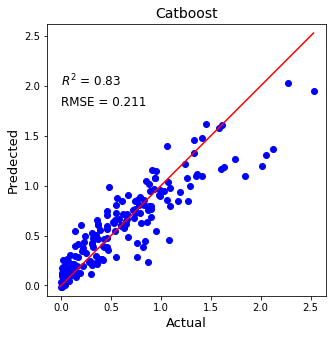

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.83', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.211', fontsize = 12)
plt.title('Catboost', fontsize = 14)
plt.show()

In [36]:
sorted_feature_importance = regressor.feature_importances_.argsort()

Text(0.5, 1.0, 'Feature Importance')

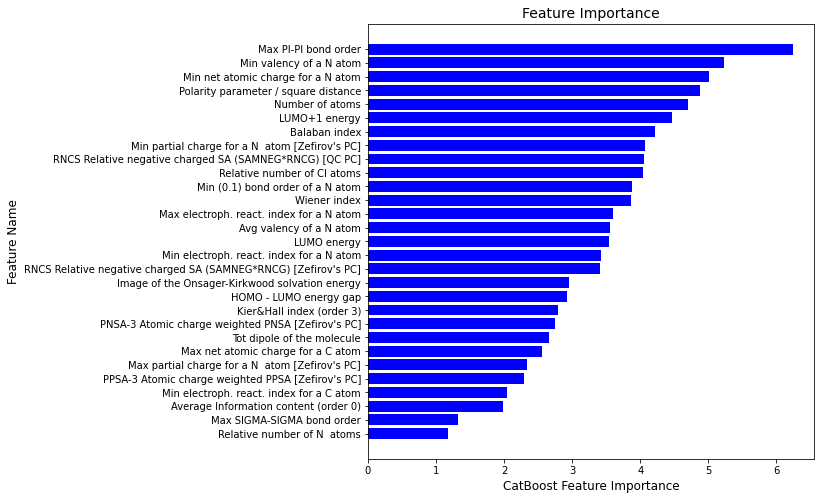

In [37]:
plt.figure(figsize=(8,8))
plt.barh(x.columns[sorted_feature_importance], 
        regressor.feature_importances_[sorted_feature_importance], align='center',alpha=1,
        color='blue')
plt.xlabel("CatBoost Feature Importance", fontsize = 12)
plt.ylabel("Feature Name", fontsize = 12)
plt.title('Feature Importance', fontsize = 14)

In [38]:
import shap

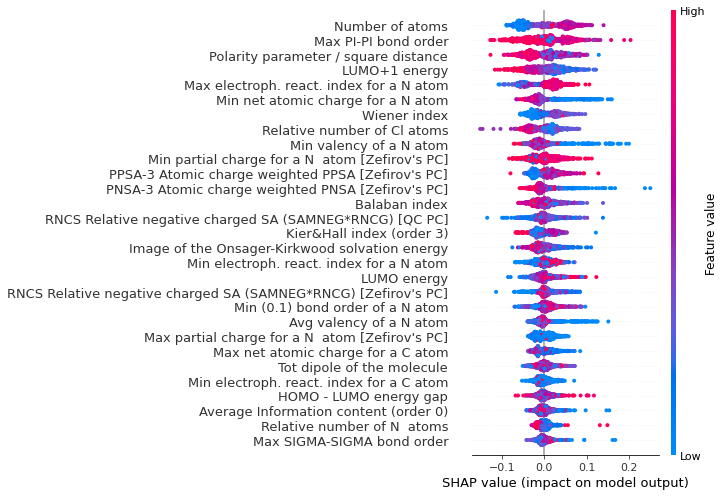

In [39]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, x.columns, show = False, plot_size=[10,7], max_display=x_train.shape[0])
plt.gcf().set_size_inches(10,7)

In [40]:
shap_values

array([[-0.05263258, -0.01888264, -0.03586666, ...,  0.00033215,
        -0.00249945, -0.02175835],
       [-0.05007624, -0.01876914, -0.03824622, ..., -0.01179014,
        -0.01214675, -0.00380804],
       [ 0.0812349 ,  0.03024654,  0.04770905, ...,  0.10352746,
         0.06525043,  0.00437493],
       ...,
       [-0.06022578, -0.02791816, -0.02890881, ..., -0.03492721,
        -0.01459614, -0.02103986],
       [ 0.04265492,  0.01115011,  0.01494777, ..., -0.00750192,
        -0.00947154,  0.00860009],
       [ 0.0548065 ,  0.00330857,  0.0040391 , ..., -0.04171198,
        -0.01268502,  0.00998218]])

In [41]:
shap_values.shape

(844, 29)

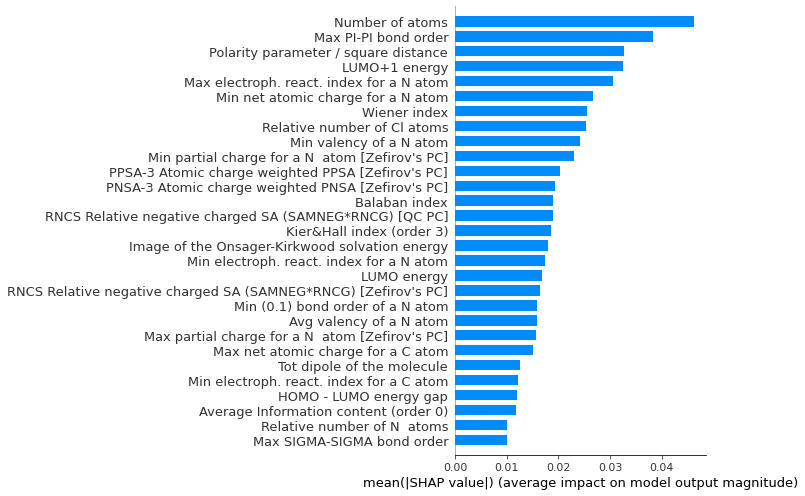

In [42]:
shap.summary_plot(shap_values, x_train,x.columns, plot_type="bar", max_display=x.shape[1], plot_size=[10,7])

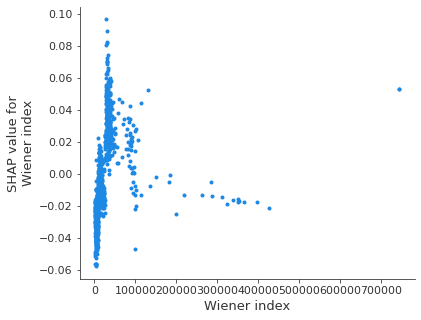

In [43]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index=None)

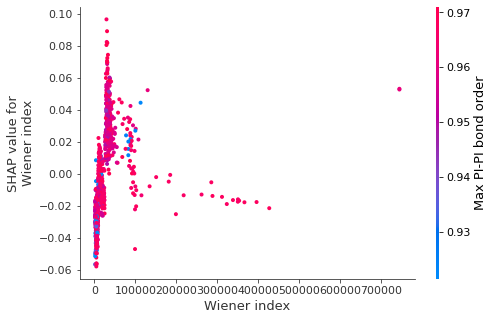

In [44]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index="auto")

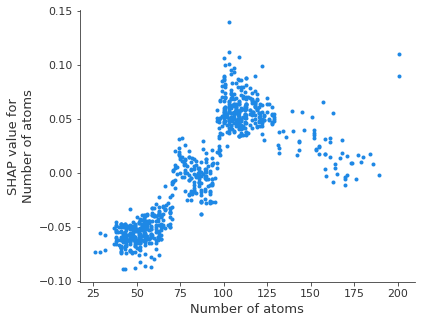

In [45]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index=None)

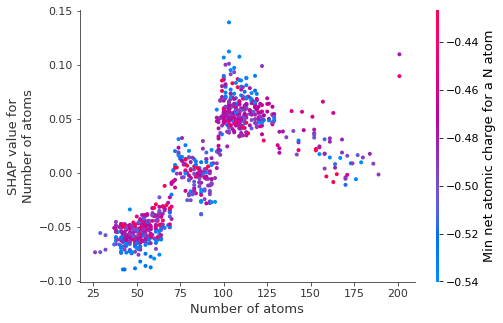

In [46]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index="auto")

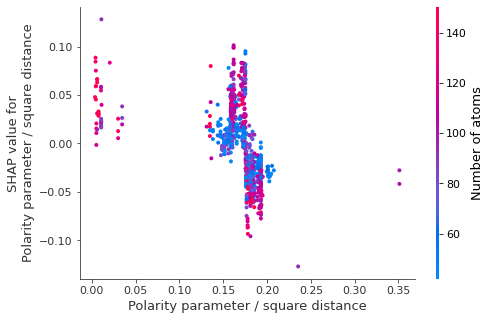

In [47]:
shap.dependence_plot("Polarity parameter / square distance", shap_values, x_train, x.columns, interaction_index="auto")

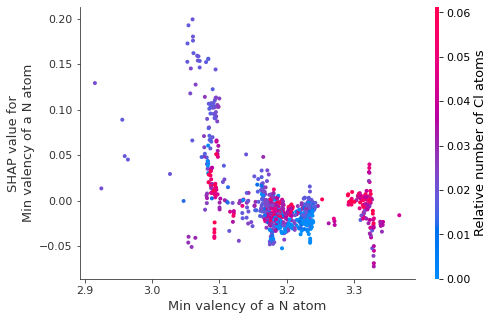

In [48]:
shap.dependence_plot("Min valency of a N atom", shap_values, x_train, x.columns, interaction_index="auto")

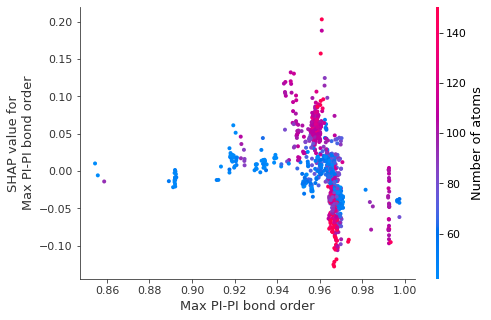

In [49]:
shap.dependence_plot("Max PI-PI bond order", shap_values, x_train, x.columns, interaction_index="auto")

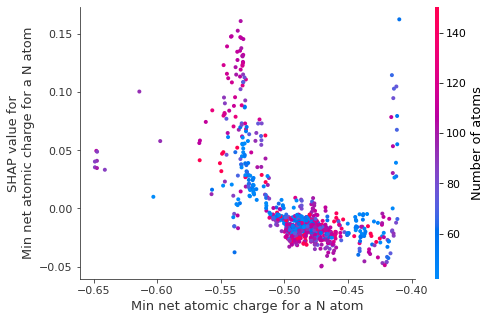

In [43]:
shap.dependence_plot("Min net atomic charge for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

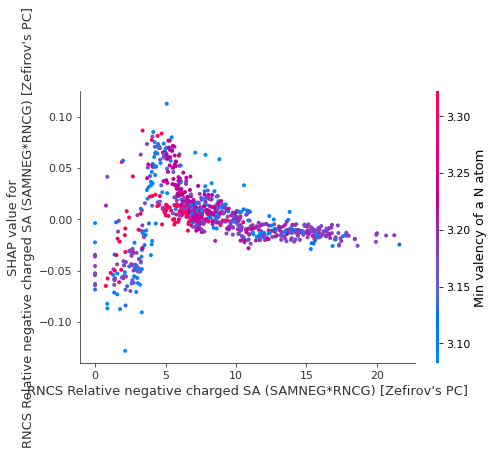

In [44]:
shap.dependence_plot("RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto")

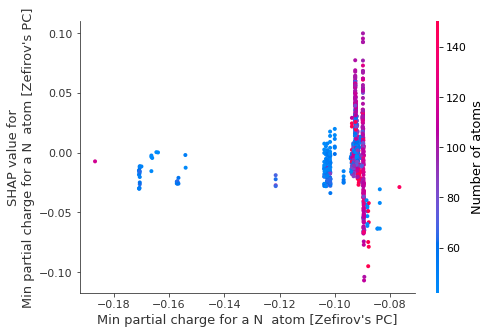

In [45]:
shap.dependence_plot("Min partial charge for a N  atom [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto") 

In [50]:
random_idx = np.random.randint(len(x_train))
random_idx

460

In [51]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)

In [52]:
shap_explainer_values = explainer(x_train, y_train)

In [53]:
type(shap_explainer_values)

shap._explanation.Explanation

In [67]:
# Choose an observation index to create the waterfall plot
obs_index = 0

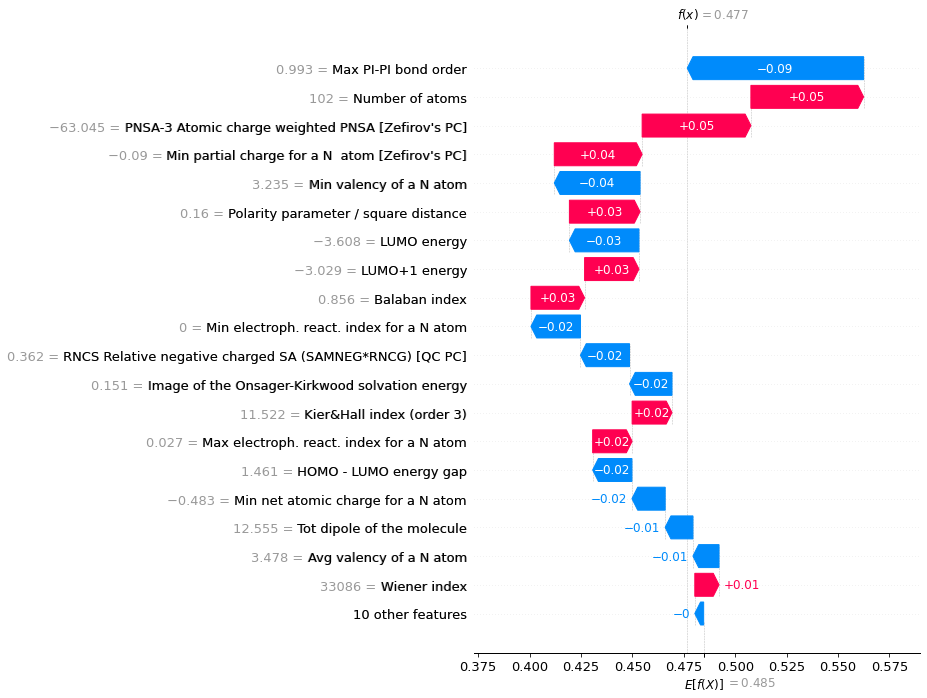

In [72]:
shap.waterfall_plot(shap_explainer_values[843],max_display=20,)

In [ ]:
shap.waterfall_plot(shap_values[obs_index][0], max_display=10, feature_names=list(x_train.columns))

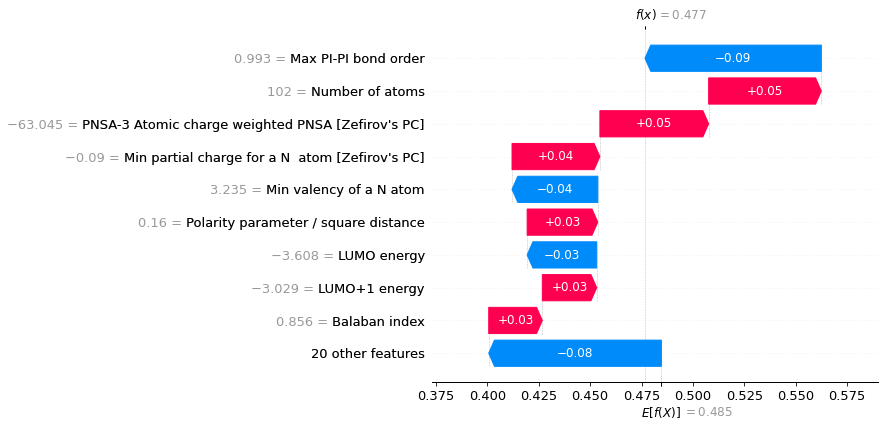

In [54]:
shap.waterfall_plot(shap_explainer_values[843],)

In [59]:
random_idx = np.random.randint(len(x_train))
random_idx

349

In [60]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)

In [61]:
# Choose an observation index to create the waterfall plot
obs_index = 0

In [66]:
shap_values_obs = shap_values[obs_index][0]
features = np.array(['Feature {}'.format(i+1) for i in range(x_train.shape[1])])
feature_names = [features[i] for i in shap_values_obs.feature_idx]
values = shap_values_obs.values

AttributeError: 'numpy.float64' object has no attribute 'feature_idx'

In [51]:
shap.initjs()

In [52]:
shap.force_plot(shap_explainer_values)

In [53]:
shap.force_plot(shap_explainer_values[10,:] ,  x_train, x.columns)

In [54]:
np.random.seed(2021)
random_mask = np.random.choice(a=[0,1], size=y_train.shape, p=[0.9,0.1])
shap.force_plot(explainer.expected_value, pd.DataFrame(shap_values)[random_mask == 1].values, x_train[random_mask == 1])

In [55]:
regressor1 = cb.CatBoostRegressor(loss_function='RMSE')

In [ ]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [ ]:
regressor_grid = GridSearchCV(estimator =regressor1, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [ ]:
regressor_grid.fit (x_train, y_train)

In [ ]:
regressor_grid.best_params_

In [ ]:
regressor_grid.best_score_

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
PartialDependenceDisplay.from_estimator(regressor, x_train, features, target=0)

In [ ]:
shap.plots.waterfall(shap_values[x_train])